<a href="https://colab.research.google.com/github/Lucas-Buk/IMT/blob/main/Cancer_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Notebook com o carregamento dos dados brutos e realização do pré-processamento

---

#**Bibliotecas e instalações**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pickle

In [ ]:
from sklearn.preprocessing import LabelEncoder

# **Dicionário de variáveis**

*   **ESCOLARI**: Código para escolaridade do paciente (int = 1).

      1 – ANALFABETO

      2 – ENS. FUND. INCOMPLETO

      3 – ENS. FUND. COMPLETO

      4 – ENSINO MÉDIO

      5 – SUPERIOR

      9 – IGNORADA
*   **IDADE**: Idade do paciente (int = 3).
*   **SEXO**: Sexo do paciente (int = 1). 

      1 – MASCULINO

      2 – FEMININO
*   **UFNASC**: UF de nascimento (char = 2). Outras opções: SI - Sem informação; OP - Outro país.	
*   **UFRESID**: UF de residência (char = 2). Outras opções: OP - Outro país.
*   **IBGE**: Código da cidade de residência do paciente segundo IBGE com digito verificador (char = 7).
*   **CIDADE**: Cidade de residência do paciente (char = 200).
*   **CATEATEND**: Categoria de atendimento ao diagnóstico (int = 1). 

      1 - CONVENIO

      2 - SUS

      3 – PARTICULAR

      9 – SEM INFORMAÇÃO
*   **DTCONSULT**: Data da 1ª consulta (date = 10). Formato: DD/MM/YYYY	
*   **CLINICA**: Código da clinica (int = 2).

      1 – ALERGIA/IMUNOLOGIA

      2 – CIRURGIA CARDIACA

      3 – CIRURGIA CABEÇA E PESCOÇO

      4 – CIRURGIA GERAL

      5 – CIRURGIA PEDIATRICA

      6 – CIRURGIA PLASTICA

      7 – CIRURGIA TORAXICA

      8 – CIRURGIA VASCULAR

      9 – CLINICA MEDICA

      10 – DERMATOLOGIA

      11 – ENDOCRINOLOGIA

      12 – GASTROCIRURGIA
      
      13 – GASTROENTEROLOGIA
      
      14 – GERIATRIA
      
      15 – GINECOLOGIA
      
      16 – GINECOLOGIA / OBSTETRICIA
      
      17 – HEMATOLOGIA
      
      18 – INFECTOLOGIA
      
      19 – NEFROLOGIA
      
      20 – NEUROCIRURGIA
      
      21 – NEUROLOGIA
      
      22 – OFTALMOLOGIA
      
      23 – ONCOLOGIA CIRURGICA
      
      24 – ONCOLOGIA CLINICA
      
      25 – ONCOLOGIA PEDIATRICA
      
      26 – ORTOPEDIA
      
      27 – OTORRINOLARINGOLOGIA
      
      28 – PEDIATRIA
      
      29 – PNEUMOLOGIA
      
      30 – PROCTOLOGIA
      
      31 – RADIOTERAPIA
      
      32 – UROLOGIA
      
      33 – MASTOLOGIA
      
      34 – ONCOLOGIA CUTANEA
      
      35 – CIRURGIA PELVICA
      
      36 – CIRURGIA ABDOMINAL
      
      37 – ODONTOLOGIA
      
      38 – TRANSPLANTE HEPATICO
      
      99 – IGNORADO	
*   **DIAGPREV**: Diagnóstico e tratamento anterior (int = 1).

      1 – SEM DIAGNÓSTICO / SEM TRATAMENTO
      
      2 – COM DIAGNÓSTICO / SEM TRATAMENTO
      
      3 – COM DIAGNÓSTICO / COM TRATAMENTO
      
      4 – OUTROS	
*   **DTDIAG**: Data do diagnóstico (date = 10). Formato: DD/MM/YYYY	
*   **BASEDIAG**: Código da base do diagnóstico (int = 1).
      
      1 – EXAME CLINICO
      
      2 – RECURSOS AUXILIARES NÃO MICROSCÓPICOS
      
      3 – CONFIRMAÇÃO MICROSCÓPICA
      
      4 – SEM INFORMAÇÃO	
*   **TOPO**: Código da topografia (char = 4). Formato: C999 	
*   **TOPOGRUP**: Grupo da topografia	(char = 3). Formato: C99	
*   **DESCTOPO**: Descrição da Topografia (char = 80).
*   **MORFO**: Código da morfologia (char = 5). Formato: 99999
*   **DESCMORFO**: Descrição da morfologia (char = 80).
*   **EC**: Estádio clínico (char = 5).
*   **ECGRUP**: Grupo do estadiamento clínico (char = 3).

      0 - Tumores primários, classificados como in situ

      I - Tumores localizados

      II - Tumores com envolvimento regional por extensão direta

      III - Tumores com envolvimento regional de linfonodos
      
      IV - Tumores com metástase à distância 

      X - Para tumores não avaliados pelo profissional responsável ou sem informação sobre estadiamento anotada no prontuário

      Y - Para tumores em que não se aplica a classificação TNM. São os tumores não sólidos (por exemplo, as leucemias)
*   **T**: Classificação TNM - T (char = 5).
*   **N**: Classificação TNM - N (char = 5).	
*   **M**: Classificação TNM - M (char = 3).	
*   **PT**: Estadiamento pós cirúrgico (char = 5).
*   **PN**: Estadiamento pós cirúrgico (char = 5).	
*   **PM**: Estadiamento pós cirúrgico (char = 3).	
*   **S**: Classificação TNM - S (int = 1). Domínio: 0; 1; 2; 3; 8 – NÃO SE APLICA; 9 – X
*   **G**: Classificação TNM – G (Grau) (char = 5). 

      Domínio (exceto C40, C41, C381, C382, C383, C47, C48 e C49):
      0; 1; 2; 3; 4; 8 – NÃO SE APLICA; 9 – X

      Domínio (somente C40, C41, C381, C382, C383, C47, C48 e C49):
      ALTO; BAIXO; 8 – NÃO SE APLICA; 9 – X
	
*   **LOCALTNM**: Classificação TNM - Localização (int = 1).
      
      1 – SUPERIOR
      
      2 – MEDIO
      
      3 – INFERIOR
      
      8 – NÃO SE APLICA
      
      9 – X	
*   **IDMITOTIC**: Classificação TNM – Índice Mitótico (int = 1).
      
      1 – ALTA
      
      2 – BAIXA
      
      8 – NÃO SE APLICA
      
      9 – X	
*   **PSA**: Classificação TNM - PSA (int = 1).
      
      1 – MENOR QUE 10
      
      2 – MAIOR OU IGUAL A 10 E MENOR QUE 20
      
      3 – MAIOR OU IGUAL A 20
      
      8 – NÃO SE APLICA
      
      9 – X	
*   **GLEASON**: Classificação TNM - Gleason (int = 1).
      
      1 – MENOR OU IGUAL A 6
      
      2 – IGUAL A 7
      
      3 – MAIOR OU IGUAL A 8
      
      8 – NÃO SE APLICA
      
      9 – X	
*   **OUTRACLA**: Outra classificação de estadiamento (char = 20).
*   **META01**: Metástase (char = 3).	Formato: C99
*   **META02**: Metástase (char = 3).	Formato: C99
*   **META03**: Metástase (char = 3).	Formato: C99
*   **META04**: Metástase (char = 3).	Formato: C99
*   **DTTRAT**: Data de inicio do tratamento (date = 10). Formato: DD/MM/YYYY	
*   **NAOTRAT**: Código da razão para não realização do tratamento (int = 1).
      
      1 – RECUSA DO TRATAMENTO
      
      2 – DOENÇA AVANÇADA, FALTA DE CONDIÇÕES CLINICAS
      
      3 – OUTRAS DOENÇAS ASSOCIADAS
      
      4 – ABANDONO DE TRATAMENTO
      
      5 – OBITO POR CANCER
      
      6 – OBITO POR OUTRAS CAUSAS, SOE
      
      7 – OUTRAS
      
      8 – NÃO SE APLICA (CASO TENHA TRATAMENTO)
      
      9 – SEM INFORMAÇÃO	
*   **TRATAMENTO**: Código de combinação dos tratamentos realizados (char = 1).
      
      A – Cirurgia
      
      B – Radioterapia
      
      C – Quimioterapia
      
      D – Cirurgia + Radioterapia
      
      E – Cirurgia + Quimioterapia
      
      F – Radioterapia + Quimioterapia
      
      G – Cirurgia + Radio + Quimio
      
      H – Cirurgia + Radio + Quimio + Hormonio
      
      I – Outras combinações de tratamento
      
      J – Nenhum tratamento realizado	
*   **TRATHOSP**: Código de combinação dos tratamentos realizados no hospital (char = 1).
      
      A – Cirurgia
      
      B – Radioterapia
      
      C – Quimioterapia
      
      D – Cirurgia + Radioterapia
      
      E – Cirurgia + Quimioterapia
      
      F – Radioterapia + Quimioterapia
      
      G – Cirurgia + Radio + Quimio
      
      H – Cirurgia + Radio + Quimio + Hormonio
      
      I – Outras combinações de tratamento

      J – Nenhum tratamento realizado	
*   **TRATFANTES**: Código de combinação dos tratamentos realizados antes/durante admissão fora do hospital (char = 1).
      
      A – Cirurgia
      
      B – Radioterapia
      
      C – Quimioterapia
      
      D – Cirurgia + Radioterapia
      
      E – Cirurgia + Quimioterapia
      
      F – Radioterapia + Quimioterapia
      
      G – Cirurgia + Radio + Quimio
      
      H – Cirurgia + Radio + Quimio + Hormonio
      
      I – Outras combinações de tratamento
      
      J – Nenhum tratamento realizado
      
      K – Sem informação
*   **TRATFAPOS**: Código de combinação dos tratamentos realizados após admissão fora do hospital (char = 1).
      
      A – Cirurgia
      
      B – Radioterapia
      
      C – Quimioterapia
      
      D – Cirurgia + Radioterapia
      
      E – Cirurgia + Quimioterapia
      
      F – Radioterapia + Quimioterapia
      
      G – Cirurgia + Radio + Quimio
      
      H – Cirurgia + Radio + Quimio + Hormonio
      
      I – Outras combinações de tratamento
      
      J – Nenhum tratamento realizado
      
      K – Sem informação
*   **NENHUM**: Tratamento recebido no hospital = nenhum (int = 1). 0 – NÃO; 1 – SIM
*   **CIRURGIA**: Tratamento recebido no hospital = cirurgia (int = 1). 0 – NÃO; 1 – SIM
*   **RADIO**: Tratamento recebido no hospital = radioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **QUIMIO**: Tratamento recebido no hospital = quimioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **HORMONIO**: Tratamento recebido no hospital = hormonioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **TMO**: Tratamento recebido no hospital = tmo (int = 1). 0 – NÃO; 1 – SIM
*   **IMUNO**: Tratamento recebido no hospital = imunoterapia (int = 1). 0 – NÃO; 1 – SIM
*   **OUTROS**: Tratamento recebido no hospital = outros (int = 1). 0 – NÃO; 1 – SIM
*   **NENHUMANT**: Tratamento recebido fora do hospital e antes da admissão = nenhum (int = 1). 0 – NÃO; 1 – SIM
*   **CIRURANT**: Tratamento recebido fora do hospital e antes da admissão = cirurgia (int = 1). 0 – NÃO; 1 – SIM
*   **RADIOANT**: Tratamento recebido fora do hospital e antes da admissão = radioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **QUIMIOANT**: Tratamento recebido fora do hospital e antes da admissão = quimioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **HORMOANT**: Tratamento recebido fora do hospital e antes da admissão = hormonioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **TMOANT**: Tratamento recebido fora do hospital e antes da admissão = tmo (int = 1). 0 – NÃO; 1 – SIM
*   **IMUNOANT**: Tratamento recebido fora do hospital e antes da admissão = imunoterapia (int = 1). 0 – NÃO; 1 – SIM
*   **OUTROANT**: Tratamento recebido fora do hospital e antes da admissão = outros (int = 1). 0 – NÃO; 1 – SIM	
*   **NENHUMAPOS**: Tratamento recebido fora do hospital e durante/após admissão = nenhum	(int = 1). 0 – NÃO; 1 – SIM	
*   **CIRURAPOS**: Tratamento recebido fora do hospital e durante/após admissão = cirurgia	(int = 1). 0 – NÃO; 1 – SIM	
*   **RADIOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = radioterapia	(int = 1). 0 – NÃO; 1 – SIM	
*   **QUIMIOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = quimioterapia	(int = 1). 0 – NÃO; 1 – SIM		
*   **HORMOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = hormonioterapia	(int = 1). 0 – NÃO; 1 – SIM		
*   **TMOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = tmo	(int = 1). 0 – NÃO; 1 – SIM		
*   **IMUNOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = imunoterapia	(int = 1). 0 – NÃO; 1 – SIM	
*   **OUTROAPOS**: Tratamento recebido fora do hospital e durante/após admissão = outros	(int = 1). 0 – NÃO; 1 – SIM	
*   **DTULTINFO**: Data da última informação do paciente (date = 10). Formato: DD/MM/YYYY
*   **ULTINFO**: Última informação sobre o paciente (int = 1).
      
      1 – VIVO, COM CÂNCER
      
      2 – VIVO, SOE
      
      3 – OBITO POR CANCER
      
      4 – OBITO POR OUTRAS CAUSAS, SOE
*   **CONSDIAG**: Diferença em dias entre as datas de consulta o diagnóstico (num = dias).
*   **TRATCONS**: Diferença em dias entre as datas de consulta e tratamento (num = dias).	
*   **DIAGTRAT**: Diferença em dias entre as datas de tratamento e diagnóstico (num = dias).
*   **ANODIAG**: Ano de diagnóstico (int = 4). Formato: 9999
*   **CICI**: Tumor infantil (char = 5).	
*   **CICIGRUP**: Tumor infantil – Grupo (char = 80).	
*   **CICISUBGRU**: Tumor infantil – Sub grupo (char = 80).	
*   **FAIXAETAR**: Faixa etária do paciente (char = 5).	
*   **LATERALI**: Lateralidade (int = 1).
      
      1 – DIREITA
      
      2 – ESQUERDA
      
      3 – BILATERAL
      
      8 - NÃO SE APLICA	
*   **INSTORIG**: Instituição de origem (char = 200). Obrigatório somente se DIAGPREV = 03 – COM DIAGNÓSTICO / COM TRATAMENTO
*   **DRS**: Departamentos Regionais de Saúde (char = 200).
*   **RRAS**: RRAS (char = 200).	
*   **PERDASEG**: Perda de seguimento (int = 1). 
      
      0 – Não
      
      1 – Sim
      
      8 – Não se aplica (excluído do cálculo para o indicador perda de seguimento)	
*   **ERRO**: Admissão com erro (int = 1). 0 – Sem; 1 – Com
*   **DTRECIDIVA**: Data da última ocorrência de recidiva (date = 10). Formato: DD/MM/YYYY	
*   **RECNENHUM**: Sem recidiva (int = 1). 0 - Não; 1 - Sim
*   **RECLOCAL**: Recidiva local (int = 1). 0 - Não; 1 - Sim	
*   **RECREGIO**: Recidiva regional (int = 1). 0 - Não; 1 - Sim	
*   **RECDIST**: Recidiva a distância / metástase (int = 1). 0 - Não; 1 - Sim	
*   **REC01**: Local da recidiva/metástase (char = 3). Formato: C99 
*   **REC02**: Local da recidiva/metástase (char = 3). Formato: C99 	
*   **REC03**: Local da recidiva/metástase (char = 3). Formato: C99 
*   **REC04**: Local da recidiva/metástase (char = 3). Formato: C99 	
*   **IBGEATEN**: Código IBGE da instituição (int = 7).	
*   **CIDO**: Código da morfologia 3ª Edição (int = 5). Formato: 99999	
*   **DSCCIDO**: Descrição da morfologia 3ª Edição (char = 89).




# **Leitura dos dados**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/pacigeral.csv', encoding='utf-8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (23,24,25,32,36,78,91) have mixed types.Specify dtype option on import or set low_memory=False.



# **Análise dos dados**

## **Informações**

In [ ]:
data.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,DESCTOPO,MORFO,DESCMORFO,EC,ECGRUP,T,N,M,PT,PN,PM,S,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,OUTRACLA,META01,META02,META03,META04,DTTRAT,NAOTRAT,TRATAMENTO,...,HORMOANT,TMOANT,IMUNOANT,OUTROANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,CICISUBGRU,FAIXAETAR,LATERALI,INSTORIG,DRS,RRAS,PERDASEG,ERRO,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO
0,4,40.0,2,SP,SP,3530805,MOGIMIRIM,9,2000-01-03,15,1,2000-01-10,3,C539,C53,COLO DO UTERO,81402,ADENOCARCINOMA IN SITU SOE,0,0,X,X,0,IS,0,0,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,07/04/2000,8,A,...,0,0,0,0,1,0,0,0,0,0,0,0,2016-09-13,2,7,95.0,88.0,2000,NaN,NaN,NaN,40-49,8,NaN,DRS 14 SĂO JOĂO DA BOA VISTA,15,1,0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,3509502,81402.0,ADENOCARCINOMA IN SITU SOE
1,9,45.0,2,RJ,SP,3509502,CAMPINAS,9,2000-01-05,15,1,2000-01-17,3,C539,C53,COLO DO UTERO,80703,CARCINOMA ESCAMOCELULAR SOE,IIIB,III,X,X,0,X,X,X,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,20/01/2000,8,F,...,0,0,0,0,1,0,0,0,0,0,0,0,2002-08-25,3,12,15.0,3.0,2000,NaN,NaN,NaN,40-49,8,NaN,DRS 07 CAMPINAS,15,0,0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,3509502,80703.0,CARCINOMA ESCAMOCELULAR SOE
2,2,63.0,2,MG,SP,3509502,CAMPINAS,9,2000-01-19,15,1,2000-01-25,3,C539,C53,COLO DO UTERO,80703,CARCINOMA ESCAMOCELULAR SOE,IIIB,III,X,X,0,X,X,X,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,03/02/2000,8,B,...,0,0,0,0,1,0,0,0,0,0,0,0,2001-03-20,3,6,15.0,9.0,2000,NaN,NaN,NaN,60-69,8,NaN,DRS 07 CAMPINAS,15,0,0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,3509502,80703.0,CARCINOMA ESCAMOCELULAR SOE
3,9,64.0,2,SP,SP,3545803,SANTA BARBARA D OESTE,9,2000-01-28,15,1,2000-02-03,3,C539,C53,COLO DO UTERO,80703,CARCINOMA ESCAMOCELULAR SOE,IIIB,III,X,X,0,X,X,X,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,01/03/2000,8,B,...,0,0,0,0,1,0,0,0,0,0,0,0,2002-07-15,3,6,33.0,27.0,2000,NaN,NaN,NaN,60-69,8,NaN,DRS 07 CAMPINAS,15,0,0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,3509502,80703.0,CARCINOMA ESCAMOCELULAR SOE
4,1,48.0,2,SP,SP,3530805,MOGIMIRIM,9,2000-01-04,15,2,2000-01-04,3,C539,C53,COLO DO UTERO,80703,CARCINOMA ESCAMOCELULAR SOE,IIIB,III,X,X,0,X,X,X,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,15/05/2000,8,B,...,0,0,0,0,1,0,0,0,0,0,0,0,2016-03-10,2,0,132.0,132.0,2000,NaN,NaN,NaN,40-49,8,NaN,DRS 14 SĂO JOĂO DA BOA VISTA,15,1,0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,3509502,80703.0,CARCINOMA ESCAMOCELULAR SOE


In [ ]:
data.shape

(943660, 95)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943660 entries, 0 to 943659
Data columns (total 95 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ESCOLARI    943660 non-null  int64  
 1   IDADE       943659 non-null  float64
 2   SEXO        943660 non-null  int64  
 3   UFNASC      943660 non-null  object 
 4   UFRESID     943660 non-null  object 
 5   IBGE        943660 non-null  int64  
 6   CIDADE      943660 non-null  object 
 7   CATEATEND   943660 non-null  int64  
 8   DTCONSULT   943660 non-null  object 
 9   CLINICA     943660 non-null  int64  
 10  DIAGPREV    943660 non-null  int64  
 11  DTDIAG      943660 non-null  object 
 12  BASEDIAG    943660 non-null  int64  
 13  TOPO        943660 non-null  object 
 14  TOPOGRUP    943660 non-null  object 
 15  DESCTOPO    943660 non-null  object 
 16  MORFO       943660 non-null  int64  
 17  DESCMORFO   943657 non-null  object 
 18  EC          943660 non-null  object 
 19  EC

In [ ]:
data.dtypes[:45]

ESCOLARI        int64
IDADE         float64
SEXO            int64
UFNASC         object
UFRESID        object
IBGE            int64
CIDADE         object
CATEATEND       int64
DTCONSULT      object
CLINICA         int64
DIAGPREV        int64
DTDIAG         object
BASEDIAG        int64
TOPO           object
TOPOGRUP       object
DESCTOPO       object
MORFO           int64
DESCMORFO      object
EC             object
ECGRUP         object
T              object
N              object
M              object
PT             object
PN             object
PM             object
S               int64
G               int64
LOCALTNM        int64
IDMITOTIC       int64
PSA             int64
GLEASON         int64
OUTRACLA       object
META01         object
META02         object
META03         object
META04         object
DTTRAT         object
NAOTRAT         int64
TRATAMENTO     object
TRATHOSP       object
TRATFANTES     object
TRATFAPOS      object
NENHUM          int64
CIRURGIA        int64
dtype: obj

In [ ]:
data.dtypes[46:]

QUIMIO          int64
HORMONIO        int64
TMO             int64
IMUNO           int64
OUTROS          int64
NENHUMANT       int64
CIRURANT        int64
RADIOANT        int64
QUIMIOANT       int64
HORMOANT        int64
TMOANT          int64
IMUNOANT        int64
OUTROANT        int64
NENHUMAPOS      int64
CIRURAPOS       int64
RADIOAPOS       int64
QUIMIOAPOS      int64
HORMOAPOS       int64
TMOAPOS         int64
IMUNOAPOS       int64
OUTROAPOS       int64
DTULTINFO      object
ULTINFO         int64
CONSDIAG        int64
TRATCONS      float64
DIAGTRAT      float64
ANODIAG         int64
CICI           object
CICIGRUP       object
CICISUBGRU     object
FAIXAETAR      object
LATERALI        int64
INSTORIG       object
DRS            object
RRAS            int64
PERDASEG        int64
ERRO            int64
DTRECIDIVA     object
RECNENHUM       int64
RECLOCAL        int64
RECREGIO        int64
RECDIST         int64
REC01          object
REC02          object
REC03          object
REC04     

In [ ]:
data.describe()

,ESCOLARI,IDADE,SEXO,IBGE,CATEATEND,CLINICA,DIAGPREV,BASEDIAG,MORFO,S,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,NAOTRAT,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,QUIMIOANT,HORMOANT,TMOANT,IMUNOANT,OUTROANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,LATERALI,RRAS,PERDASEG,ERRO,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,IBGEATEN,CIDO
count,943660.00000,943659.000000,943660.000000,9.436600e+05,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.0,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.0,943660.0,943660.0,943660.0,943660.0,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.000000,868764.000000,868764.000000,943660.000000,943660.000000,943660.000000,943660.000000,943660.0,943660.000000,943660.000000,943660.000000,943660.000000,9.436600e+05,943631.000000
mean,4.37267,59.832544,1.500366,3.545901e+06,4.925719,21.468955,1.371384,2.987796,83645.271036,8.0,7.851896,7.980918,7.997274,7.803760,7.806778,7.796074,0.083336,0.624015,0.260059,0.350319,0.122043,0.003889,0.006654,0.063399,0.999332,0.000001,0.000001,0.0,0.0,0.0,0.0,0.0,0.942144,0.004360,0.029190,0.008128,0.002320,0.000252,0.000152,0.006662,2.436262,52.378192,68.910686,65.945955,2010.314762,6.889584,16.035628,0.173644,0.0,0.917301,0.040326,0.024385,0.022254,3.533473e+06,83645.472312
std,2.94082,16.869766,0.500000,3.686201e+05,3.541344,12.621792,0.483175,0.245657,4587.585415,0.0,0.952922,0.354786,0.134579,1.124976,1.086837,0.895393,0.276390,0.484376,0.438667,0.477070,0.327336,0.062241,0.081300,0.243679,0.025830,0.001029,0.001029,0.0,0.0,0.0,0.0,0.0,0.233470,0.065883,0.168338,0.089788,0.048107,0.015879,0.012309,0.081351,0.860431,166.758604,151.221891,149.361384,5.264743,2.453975,23.992836,0.378803,0.0,0.275427,0.196723,0.154241,0.147508,1.905791e+04,4588.360210
min,1.00000,0.000000,1.000000,1.100015e+06,1.000000,1.000000,1.000000,1.000000,80001.000000,8.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2000.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,3.502804e+06,80001.000000
25%,2.00000,51.000000,1.000000,3.517505e+06,2.000000,12.000000,1.000000,3.000000,80762.000000,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,11.000000,0.000000,2006.000000,8.000000,6.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,3.509502e+06,80762.000000
50%,3.00000,62.000000,2.000000,3.540606e+06,2.000000,24.000000,1.000000,3.000000,81403.000000,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,22.000000,39.000000,32.000000,2011.000000,8.000000,10.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,3.543402e+06,81403.000000
75%,9.00000,72.000000,2.000000,3.550308e+06,9.000000,29.000000,2.000000,3.000000,85003.000000,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.000000,81.000000,84.000000,2015.000000

In [ ]:
fig = px.bar(x = np.sort(data.ANODIAG.unique()), y = data.ANODIAG.value_counts().sort_index(), labels={'x':'Ano', 'y':'Quantidade de casos'},
             title = 'Número de casos por ano')
fig.show()

In [ ]:
masc = data[data.SEXO == 1]
fem = data[data.SEXO == 2]

In [ ]:
mascx = np.sort(masc.ANODIAG.unique())
mascy = masc.ANODIAG.value_counts().sort_index()

femx = np.sort(fem.ANODIAG.unique())
femy = fem.ANODIAG.value_counts().sort_index()

fig = go.Figure()

fig.add_trace(go.Bar(x = mascx,
                     y = mascy,
                     name = 'Masculino',
              ))

fig.add_trace(go.Bar(x = femx,
                     y = femy,
                     name = 'Feminino',
              ))

fig.update_layout(barmode = 'group', title_text='Pacientes por ano',
                  yaxis_title = 'Indivíduos', xaxis_title = 'Ano')

fig.show()

In [ ]:
masc.FAIXAETAR = masc.FAIXAETAR.replace(['00-09', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69'],
                                        ['00 a 09', '10 a 19', '20 a 29', '30 a 39', '40 a 49', '50 a 59', '60 a 69'])
fem.FAIXAETAR = fem.FAIXAETAR.replace(['00-09', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69'],
                                      ['00 a 09', '10 a 19', '20 a 29', '30 a 39', '40 a 49', '50 a 59', '60 a 69'])

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
mascx = np.sort(masc.FAIXAETAR.unique())
mascy = masc.FAIXAETAR.value_counts().sort_index()

femx = np.sort(fem.FAIXAETAR.unique())
femy = fem.FAIXAETAR.value_counts().sort_index()

fig = go.Figure()

fig.add_trace(go.Scatter(x = mascx,
                         y = (mascy/masc.shape[0])*100,
                         name = 'Masculino',
                         mode = 'lines+markers',
              ))

fig.add_trace(go.Scatter(x = femx,
                         y = (femy/fem.shape[0])*100,
                         name = 'Feminino',
                         mode = 'lines+markers',
              ))

fig.update_layout(title_text='Pacientes por faixa etária',
                  yaxis_title = '% Pacientes total por sexo', xaxis_title = 'Faixa etária')

fig.show()

In [ ]:
# O estádio clínico auxilia o médico no planejamento terapêutico e na avaliação 
# do tratamento proposto, além de servir para a predição do prognóstico.
## Na análise dos dados segundo estadiamento foram excluídos os casos informados 
## como X (casos nos quais não é possível realizar o estadiamento ou sem informação)
## e Y (tipo de câncer em que não se aplica a classificação de tumores malignos TNM).

EC = list(np.sort(data.ECGRUP.unique()))[:5] # Categories 0, I, II, III, IV

mascEC = masc.loc[masc.ECGRUP.isin(EC)]
femEC = fem.loc[fem.ECGRUP.isin(EC)]

mascx = np.sort(mascEC.ECGRUP.unique())
mascy = mascEC.ECGRUP.value_counts().sort_index()

femx = np.sort(femEC.ECGRUP.unique())
femy = femEC.ECGRUP.value_counts().sort_index()

fig = go.Figure()

fig.add_trace(go.Bar(x = mascx,
                     y = (mascy/mascEC.shape[0])*100,
                     name = 'Masculino',
              ))

fig.add_trace(go.Bar(x = femx,
                     y = (femy/femEC.shape[0])*100,
                     name = 'Feminino',
              ))

fig.update_layout(barmode = 'group', title_text='Pacientes por estádio clínico',
                  yaxis_title = '% de indivíduos', xaxis_title = 'Estádio clínico')

fig.show()

In [ ]:
df_diag1 = data[data.DIAGPREV == 1] # Sem diagnóstico/sem tratamento
df_diag2 = data[data.DIAGPREV == 2] # Com diagnóstico/sem tratamento

In [ ]:
x = np.sort(df_diag1.ANODIAG.unique())
y = df_diag1.groupby('ANODIAG')['CONSDIAG'].median() #mediana do número de dias entre consulta e diagnóstico

fig = go.Figure(go.Scatter(x=x, y=y, mode = 'lines+markers+text', text=y, textposition='top center'))
fig.update_layout(title='Mediana do número de dias entre consulta e diagnóstico por ano',
                   xaxis_title='Ano',
                   yaxis_title='Número de dias')
fig.show()

In [ ]:
# Excluindo C44 (com morfologias entre 80101 e 81103), quem não fez tratamento e Morfologia 80001 (neoplasias de comportamento incerto)
df1 = df_diag1[(df_diag1.TOPOGRUP == 'C44') & (df_diag1.MORFO > 80101) & (df_diag1.MORFO < 81103)]
df2 = df_diag2[(df_diag2.TOPOGRUP == 'C44') & (df_diag2.MORFO > 80101) & (df_diag2.MORFO < 81103)]

id1 = df1.index
df_diag1 = df_diag1.drop(id1)

id2 = df2.index
df_diag2 = df_diag2.drop(id2)

df_diag1 = df_diag1[(df_diag1.NAOTRAT == 8) & (df_diag1.MORFO != 80001)] 
df_diag2 = df_diag2[(df_diag2.NAOTRAT == 8) & (df_diag2.MORFO != 80001)]

In [ ]:
x1 = np.sort(df_diag1.ANODIAG.unique())
y1 = df_diag1.groupby('ANODIAG')['DIAGTRAT'].median()

x2 = np.sort(df_diag2.ANODIAG.unique())
y2 = df_diag2.groupby('ANODIAG')['DIAGTRAT'].median()

fig = go.Figure()

fig.add_trace(go.Scatter(x = x1,
                         y = y1,
                         name = 'Sem diagnóstico',
                         mode = 'lines+markers+text', 
                         text=y1, textposition='top center',
              ))

fig.add_trace(go.Scatter(x = x2,
                         y = y2,
                         name = 'Com diagnóstico',
                         mode = 'lines+markers+text', 
                         text=y2, textposition='top center',
              ))

fig.update_layout(title_text='Número de dias entre diagnóstico e tratamento por ano',
                  yaxis_title = 'Número de dias', xaxis_title = 'Ano')

fig.show()

In [ ]:
# 1 – VIVO, COM CÂNCER; 2 – VIVO, SOE; 3 – OBITO POR CANCER; 4 – OBITO POR OUTRAS CAUSAS, SOE 
#### Possível label
data['ULTINFO'].value_counts()

2    435227
3    275159
4    123266
1    110008
Name: ULTINFO, dtype: int64

In [ ]:
mascx = np.sort(masc.ULTINFO.unique())
mascy = masc.ULTINFO.value_counts().sort_index()

femx = np.sort(fem.ULTINFO.unique())
femy = fem.ULTINFO.value_counts().sort_index()

fig = go.Figure()

fig.add_trace(go.Bar(x = mascx,
                     y = mascy,
                     name = 'Masculino',
              ))

fig.add_trace(go.Bar(x = femx,
                     y = femy,
                     name = 'Feminino',
              ))

fig.update_xaxes(
    ticktext=["Vivo, com câncer", "Vivo, SOE", "Óbito por câncer", "Óbito outras causa, SOE"],
    tickvals=[1, 2, 3, 4],
)

fig.update_layout(barmode = 'group', title_text='Última informação dos pacientes',
                  yaxis_title = 'Indivíduos', xaxis_title = 'Última informação')

fig.show()

In [ ]:
corr_matrix = data.corr()
corr_matrix['ULTINFO'].sort_values(ascending = False)

ULTINFO       1.000000
CATEATEND     0.209677
IDADE         0.179051
GLEASON       0.123226
PSA           0.118750
NENHUM        0.108192
LATERALI      0.077999
RECREGIO      0.068783
QUIMIO        0.054078
NENHUMAPOS    0.052510
RADIO         0.037872
RECLOCAL      0.034662
RECDIST       0.019467
G             0.019415
IDMITOTIC     0.011788
NENHUMANT     0.008194
CIRURANT     -0.000522
RADIOANT     -0.000522
TMO          -0.003801
IMUNO        -0.004610
OUTROS       -0.004980
TMOAPOS      -0.006424
IMUNOAPOS    -0.007243
BASEDIAG     -0.016254
IBGE         -0.016555
LOCALTNM     -0.018795
TRATCONS     -0.021244
CIRURAPOS    -0.024802
HORMOAPOS    -0.029185
IBGEATEN     -0.037029
OUTROAPOS    -0.042629
RRAS         -0.043626
RADIOAPOS    -0.044204
CONSDIAG     -0.045605
DIAGPREV     -0.049736
QUIMIOAPOS   -0.049821
DIAGTRAT     -0.055853
HORMONIO     -0.060877
CIDO         -0.062996
MORFO        -0.063005
CLINICA      -0.063309
RECNENHUM    -0.068966
ESCOLARI     -0.069296
SEXO       

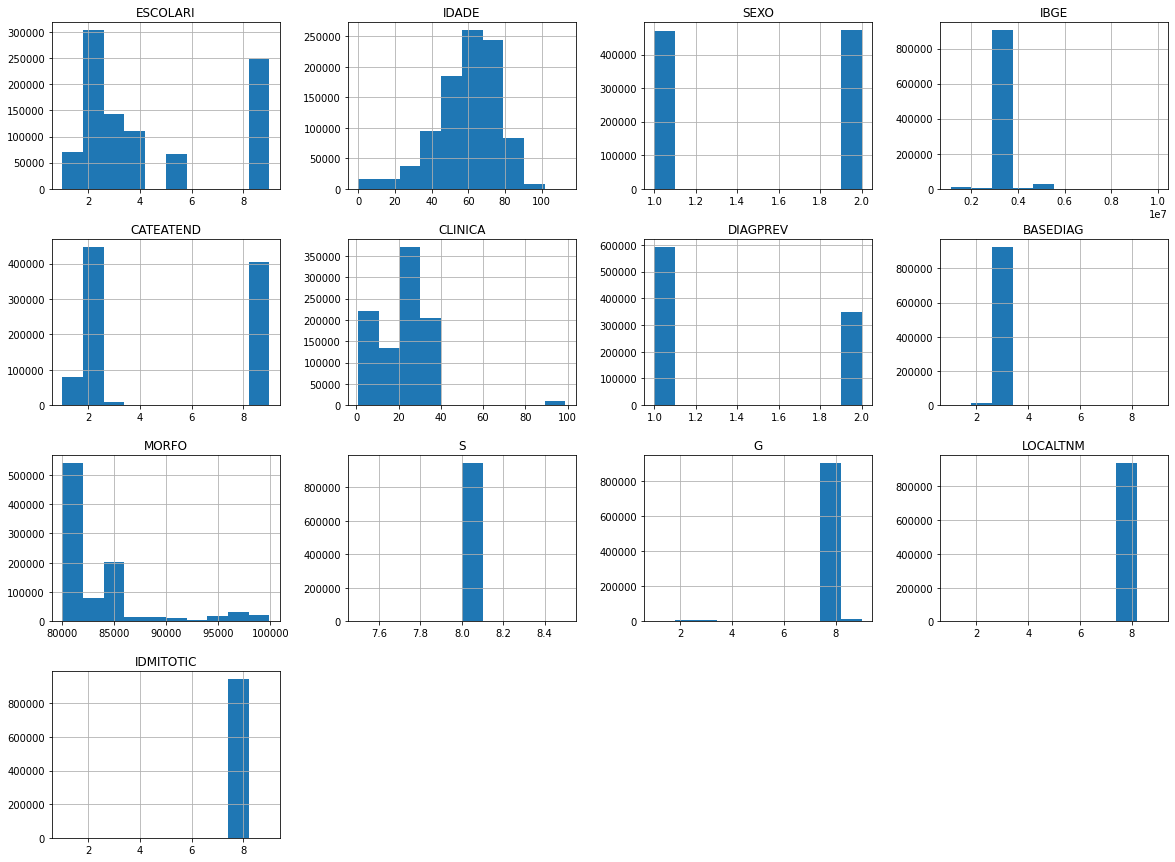

In [ ]:
data.iloc[:,:30].hist(bins=10,figsize=(20,15))
plt.show()

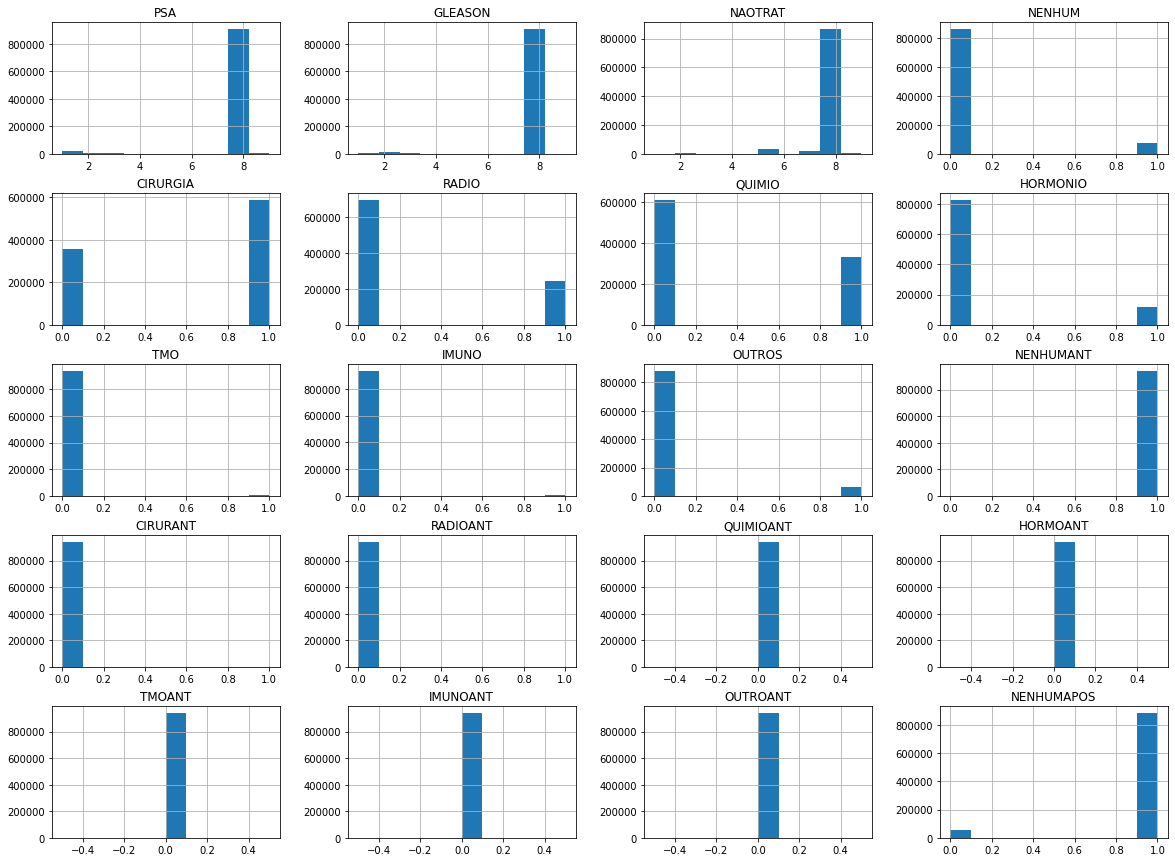

In [ ]:
data.iloc[:,30:60].hist(bins=10,figsize=(20,15))
plt.show()

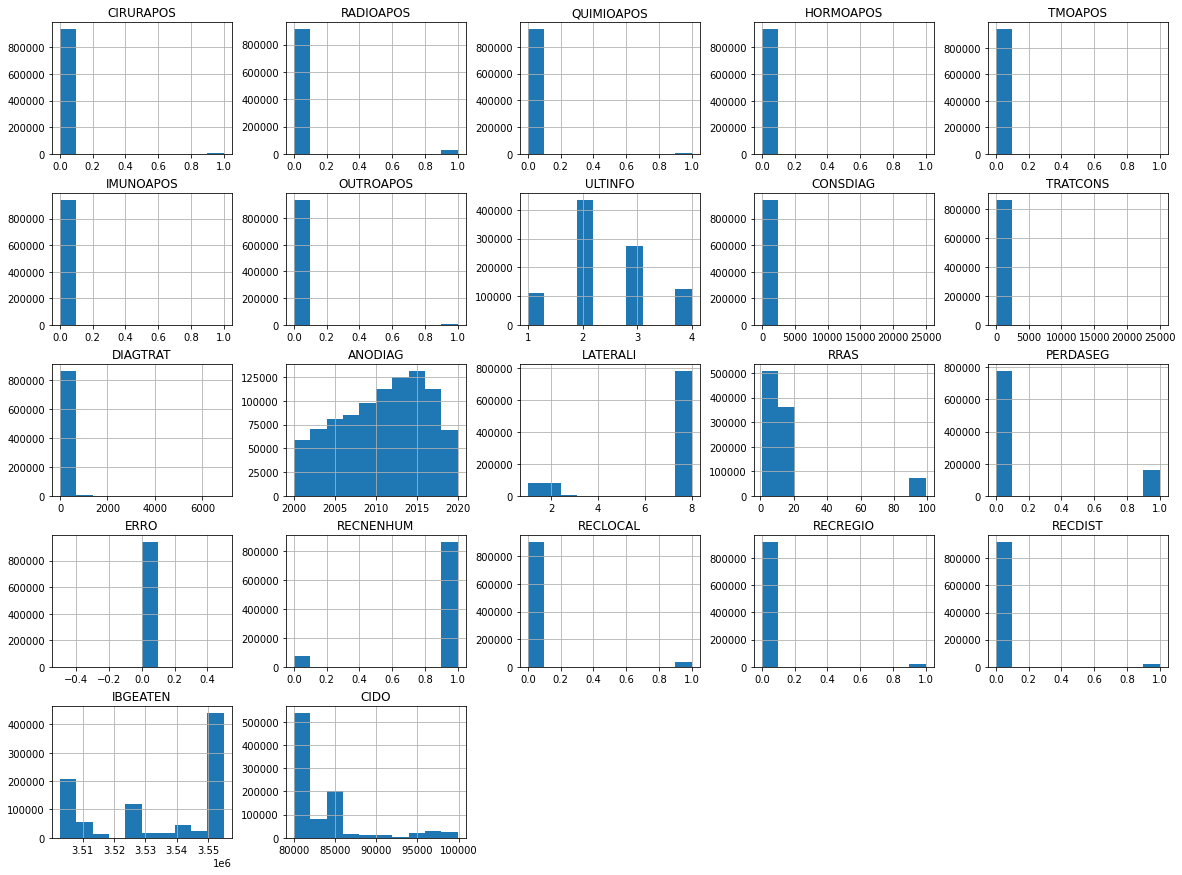

In [ ]:
data.iloc[:,60:].hist(bins=10,figsize=(20,15))
plt.show()

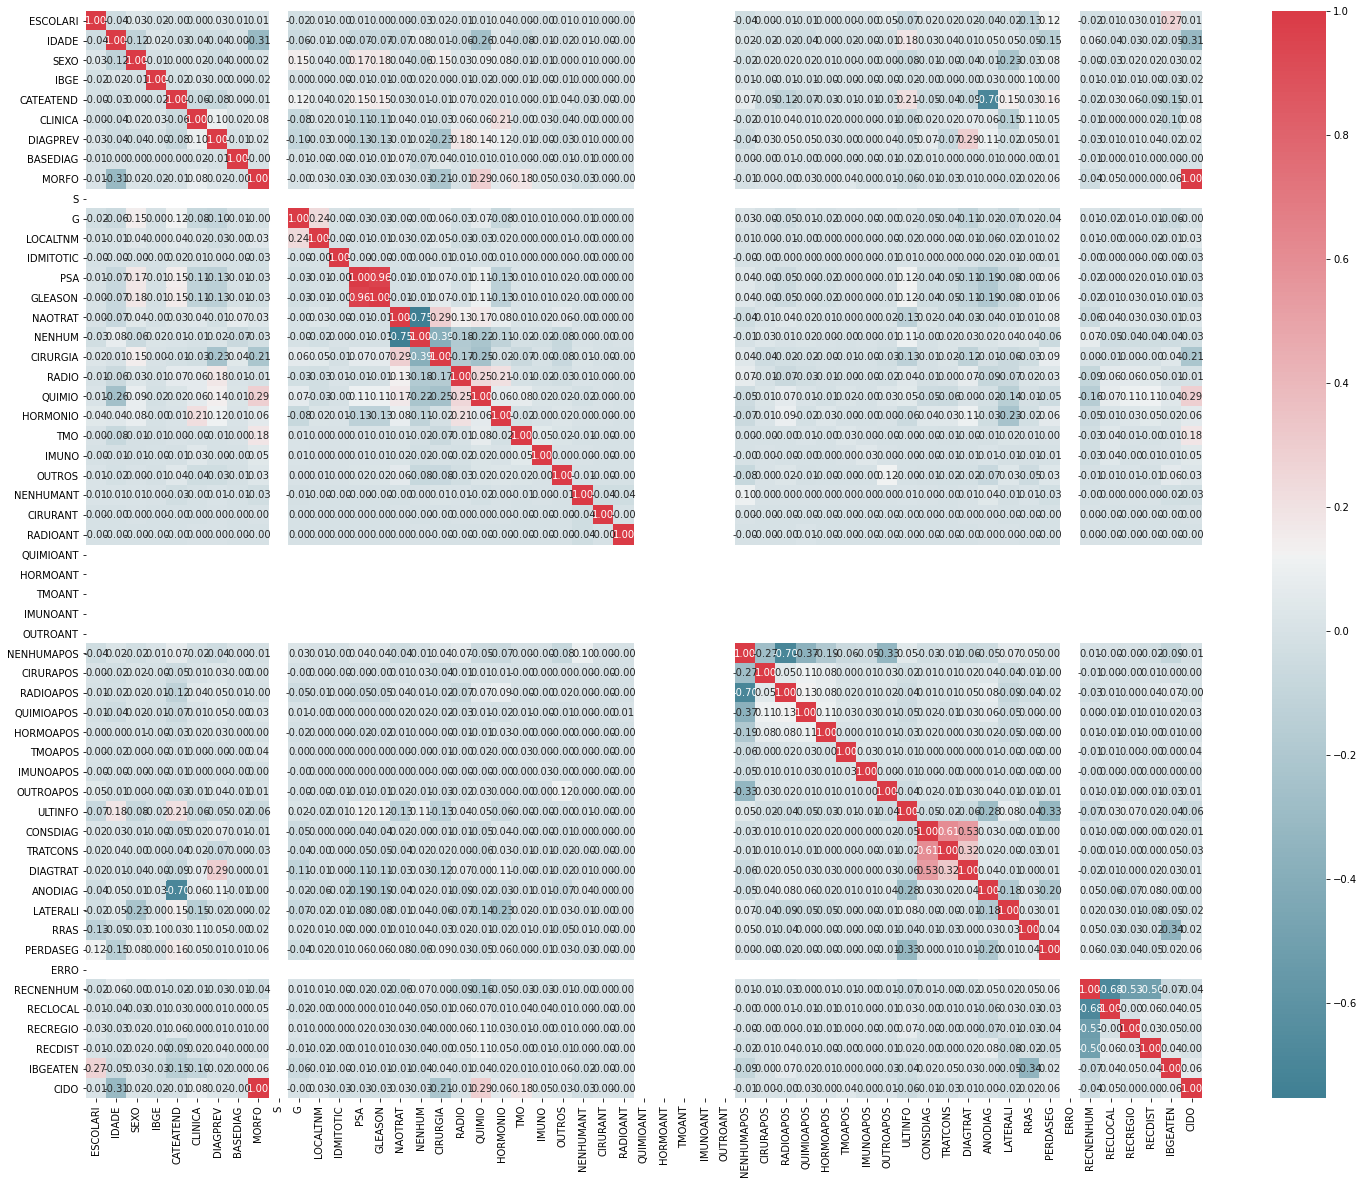

In [ ]:
correlations = corr_matrix

fig, ax = plt.subplots(figsize = (25,20))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
 
sns.heatmap(correlations, cmap = colormap, annot = True, fmt = '.2f')
fig.show()

### **Análise cidade de residência e não realização do tratamento**

In [ ]:
data.head(3)

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,DESCTOPO,MORFO,DESCMORFO,EC,ECGRUP,T,N,M,PT,PN,PM,S,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,OUTRACLA,META01,META02,META03,META04,DTTRAT,NAOTRAT,TRATAMENTO,...,HORMOANT,TMOANT,IMUNOANT,OUTROANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,CICISUBGRU,FAIXAETAR,LATERALI,INSTORIG,DRS,RRAS,PERDASEG,ERRO,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO
0,4,40.0,2,SP,SP,3530805,MOGIMIRIM,9,2000-01-03,15,1,2000-01-10,3,C539,C53,COLO DO UTERO,81402,ADENOCARCINOMA IN SITU SOE,0,0,X,X,0,IS,0,0,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,07/04/2000,8,A,...,0,0,0,0,1,0,0,0,0,0,0,0,2016-09-13,2,7,95.0,88.0,2000,NaN,NaN,NaN,40-49,8,NaN,DRS 14 SĂO JOĂO DA BOA VISTA,15,1,0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,3509502,81402.0,ADENOCARCINOMA IN SITU SOE
1,9,45.0,2,RJ,SP,3509502,CAMPINAS,9,2000-01-05,15,1,2000-01-17,3,C539,C53,COLO DO UTERO,80703,CARCINOMA ESCAMOCELULAR SOE,IIIB,III,X,X,0,X,X,X,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,20/01/2000,8,F,...,0,0,0,0,1,0,0,0,0,0,0,0,2002-08-25,3,12,15.0,3.0,2000,NaN,NaN,NaN,40-49,8,NaN,DRS 07 CAMPINAS,15,0,0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,3509502,80703.0,CARCINOMA ESCAMOCELULAR SOE
2,2,63.0,2,MG,SP,3509502,CAMPINAS,9,2000-01-19,15,1,2000-01-25,3,C539,C53,COLO DO UTERO,80703,CARCINOMA ESCAMOCELULAR SOE,IIIB,III,X,X,0,X,X,X,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,03/02/2000,8,B,...,0,0,0,0,1,0,0,0,0,0,0,0,2001-03-20,3,6,15.0,9.0,2000,NaN,NaN,NaN,60-69,8,NaN,DRS 07 CAMPINAS,15,0,0,NaN,1,0,0,0,NaN,NaN,NaN,NaN,3509502,80703.0,CARCINOMA ESCAMOCELULAR SOE


In [ ]:
df_muni = data[['UFRESID','IBGE','NAOTRAT']]
df_muni = df_muni[df_muni.UFRESID != 'OP']
df_muni.head(3)

,UFRESID,IBGE,NAOTRAT
0,SP,3530805,8
1,SP,3509502,8
2,SP,3509502,8


In [ ]:
df_cities = pd.read_csv('https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/municipios.csv')
df_cities = df_cities[['codigo_ibge','nome','latitude','longitude']]
df_cities.head()

,codigo_ibge,nome,latitude,longitude
0,5200050,Abadia de Goiás,-16.75730,-49.4412
1,3100104,Abadia dos Dourados,-18.48310,-47.3916
2,5200100,Abadiânia,-16.19700,-48.7057
3,3100203,Abaeté,-19.15510,-45.4444
4,1500107,Abaetetuba,-1.72183,-48.8788


In [ ]:
df_muni = df_muni.merge(df_cities, how='left', left_on='IBGE', right_on='codigo_ibge')
df_muni.head(5)

,UFRESID,IBGE,NAOTRAT,codigo_ibge,nome,latitude,longitude
0,SP,3530805,8,3530805,Mogi Mirim,-22.4332,-46.9532
1,SP,3509502,8,3509502,Campinas,-22.9053,-47.0659
2,SP,3509502,8,3509502,Campinas,-22.9053,-47.0659
3,SP,3545803,8,3545803,Santa Bárbara d'Oeste,-22.7553,-47.4143
4,SP,3530805,8,3530805,Mogi Mirim,-22.4332,-46.9532


In [ ]:
df_muni.NAOTRAT.value_counts()

8    868164
5     30655
7     20391
2      9166
9      7323
6      2474
3      1892
4      1718
1      1581
Name: NAOTRAT, dtype: int64

In [ ]:
df_muni['razao'] = df_muni.NAOTRAT.replace([1,2,3,4,5,6,7,8,9],
                                           ['RECUSA DO TRATAMENTO','DOENÇA AVANÇADA, FALTA DE CONDIÇÕES CLINICAS','OUTRAS DOENÇAS ASSOCIADAS',
                                            'ABANDONO DE TRATAMENTO','OBITO POR CANCER','OBITO POR OUTRAS CAUSAS, SOE','OUTRAS','NÃO SE APLICA',
                                            'SEM INFORMAÇÃO'])
df_muni.head(3)

,UFRESID,IBGE,NAOTRAT,codigo_ibge,nome,latitude,longitude,razao
0,SP,3530805,8,3530805,Mogi Mirim,-22.4332,-46.9532,NÃO SE APLICA
1,SP,3509502,8,3509502,Campinas,-22.9053,-47.0659,NÃO SE APLICA
2,SP,3509502,8,3509502,Campinas,-22.9053,-47.0659,NÃO SE APLICA


In [ ]:
df_naotrat = df_muni[df_muni.NAOTRAT.isin([1,4,7])]
df_naotrat.shape

(23690, 8)

In [ ]:
df_hosp = pd.DataFrame()
df_hosp['Hospitais'] = data.IBGEATEN.unique()
df_hosp.head(2)

,Hospitais
0,3509502
1,3543402


In [ ]:
df_hosp = df_hosp.merge(df_cities, how='left', left_on='Hospitais', right_on='codigo_ibge')
df_hosp.head()

,Hospitais,codigo_ibge,nome,latitude,longitude
0,3509502,3509502,Campinas,-22.9053,-47.0659
1,3543402,3543402,Ribeirão Preto,-21.1699,-47.8099
2,3554102,3554102,Taubaté,-23.0104,-45.5593
3,3550308,3550308,São Paulo,-23.5329,-46.6395
4,3506003,3506003,Bauru,-22.3246,-49.0871


In [ ]:
fig = px.scatter_geo(df_naotrat, 
                     lat='latitude', 
                     lon='longitude',
                     color='razao',
                     scope='south america',
                     projection='natural earth'
                     )

fig.add_scattergeo(lat=df_hosp.latitude, 
                   lon=df_hosp.longitude,
                   name='Hospitais',
                   marker=dict(color='orange', size=7, symbol='diamond')
                   )

fig.update_layout(template='xgridoff', 
                  margin={"r":0,"l":0,"b":0}, 
                  title_text="Razão para não tratamento")
fig.update_layout()

fig.show()

## **Variáveis faltantes**

In [ ]:
missing = data.isna().sum().sort_values(ascending=False)
prop = missing[missing > 0]/data.shape[0]
prop

INSTORIG      0.999511
REC04         0.998494
META04        0.996361
REC03         0.994401
META03        0.987246
REC02         0.982164
CICI          0.972926
CICIGRUP      0.972926
CICISUBGRU    0.972926
META02        0.960153
REC01         0.937256
OUTRACLA      0.935571
DTRECIDIVA    0.899434
META01        0.868684
PM            0.579580
PN            0.556207
PT            0.551369
TRATCONS      0.079368
DIAGTRAT      0.079368
DTTRAT        0.079368
DRS           0.075212
DTULTINFO     0.000048
CIDO          0.000031
DSCCIDO       0.000031
DESCMORFO     0.000003
IDADE         0.000001
dtype: float64

In [ ]:
fig = px.bar(x = prop.index, y = prop*100, labels={'y': '%', 'x':'Variable'},title='Percentage of missing data per column')
fig.show()

In [ ]:
# INSTORIG - Instituição de origem. Obrigatório somente se DIAGPREV = 03 – COM DIAGNÓSTICO / COM TRATAMENTO
data[data['INSTORIG'].isna() == False]['INSTORIG'].shape

(461,)

In [ ]:
# REC04 - Local da recidiva/metástase. Formato: C99
data[data['REC04'].isna() == False]['REC04'].shape

(1421,)

In [ ]:
# META04 - Metástase. Formato: C99
data[data['META04'].isna() == False]['META04'].shape

(3434,)

In [ ]:
# REC03 - Local da recidiva/metástase. Formato: C99
data[data['REC03'].isna() == False]['REC03'].shape

(5284,)

In [ ]:
# META03 - Metástase. Formato: C99
data[data['META03'].isna() == False]['META03'].shape

(12035,)

In [ ]:
# REC02 - Local da recidiva/metástase. Formato: C99
data[data['REC02'].isna() == False]['REC02'].shape

(16831,)

In [ ]:
# CICI - Tumor infantil
data[data['CICI'].isna() == False]['CICI'].shape

(25549,)

In [ ]:
# CICIGRUP - Tumor infantil - Grupo
data[data['CICIGRUP'].isna() == False]['CICIGRUP'].shape

(25549,)

In [ ]:
# CICISUBGRU - Tumor infantil - Sub grupo
data[data['CICISUBGRU'].isna() == False]['CICISUBGRU'].shape

(25549,)

In [ ]:
# META02 - Metástase. Formato: C99
data[data['META02'].isna() == False]['META02'].shape

(37602,)

In [ ]:
# REC01 - Local da recidiva/metástase. Formato: C99
data[data['REC01'].isna() == False]['REC01'].shape

(59209,)

In [ ]:
# OUTRACLA - Outra classificação de estadiamento
data[data['OUTRACLA'].isna() == False]['OUTRACLA'].shape

(60799,)

In [ ]:
# DTRECIDIVA - Data da última ocorrência de recidiva
data[data['DTRECIDIVA'].isna() == False]['DTRECIDIVA'].shape

(94900,)

In [ ]:
# META01 - Metástase. Formato: C99
data[data['META01'].isna() == False]['META01'].shape

(123918,)

In [ ]:
# PM - Estadiamento pós cirúrgico
data[data['PM'].isna() == False]['PM'].shape

(396734,)

In [ ]:
# PN - Estadiamento pós cirúrgico
data[data['PN'].isna() == False]['PN'].shape

(418790,)

In [ ]:
# PT - Estadiamento pós cirúrgico
data[data['PT'].isna() == False]['PT'].shape

(423355,)

In [ ]:
# TRATCONS - Diferença em dias entre as datas de consulta e tratamento
data[data['TRATCONS'].isna() == False]['TRATCONS'].shape

(868764,)

In [ ]:
# DIAGTRAT - Diferença em dias entre as datas de tratamento e diagnóstico
data[data['DIAGTRAT'].isna() == False]['DIAGTRAT'].shape

(868764,)

In [ ]:
# DTTRAT - Data de inicio do tratamento 
data[data['DTTRAT'].isna() == False]['DTTRAT'].shape

(868764,)

In [ ]:
# DRS - DRS 
data[data['DRS'].isna() == False]['DRS'].shape

(872685,)

In [ ]:
# DTULTINFO - Data da última informação do paciente
data[data['DTULTINFO'].isna() == False]['DTULTINFO'].shape

(943615,)

In [ ]:
# CIDO - Código da morfologia 3ª Edição
data[data['CIDO'].isna() == False]['CIDO'].shape 

(943631,)

In [ ]:
# DSCCIDO - Descrição da morfologia 3ª Edição
data[data['DSCCIDO'].isna() == False]['DSCCIDO'].shape 

(943631,)

In [ ]:
# DESCMORFO - Descrição da morfologia
data[data['DESCMORFO'].isna() == False]['DESCMORFO'].shape

(943657,)

In [ ]:
# IDADE - Idade do paciente
data[data['IDADE'].isna() == False]['IDADE'].shape

(943659,)

# **Pré-processamento**



In [ ]:
df_aux = data.copy()
df_aux.shape

(943660, 95)

##**Datas**

*   **DTCONSULT**: Data da 1ª consulta (date = 10). Formato: DD/MM/YYYY	
*   **DTDIAG**: Data do diagnóstico (date = 10). Formato: DD/MM/YYYY
*   **DTTRAT**: Data de inicio do tratamento (date = 10). Formato: DD/MM/YYYY	
*   **DTULTINFO**: Data da última informação do paciente (date = 10). Formato: DD/MM/YYYY
*   **DTRECIDIVA**: Data da última ocorrência de recidiva (date = 10). Formato: DD/MM/YYYY

In [ ]:
# Data - DTCONSULT, DTDIAG, DTTRAT, DTULTINFO, DTRECIDIVA
dates = ['DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTULTINFO', 'DTRECIDIVA'] ### drop
data[dates].isna().sum()

DTCONSULT          0
DTDIAG             0
DTTRAT         74896
DTULTINFO         45
DTRECIDIVA    848760
dtype: int64

In [ ]:
data[dates].dtypes

DTCONSULT     object
DTDIAG        object
DTTRAT        object
DTULTINFO     object
DTRECIDIVA    object
dtype: object

In [ ]:
for c in dates:
  df_aux[c] = pd.to_datetime(df_aux[c])

df_aux[dates].dtypes

DTCONSULT     datetime64[ns]
DTDIAG        datetime64[ns]
DTTRAT        datetime64[ns]
DTULTINFO     datetime64[ns]
DTRECIDIVA    datetime64[ns]
dtype: object

##**Categorias numéricas**

*   **ESCOLARI**: Código para escolaridade do paciente (int = 1).

      1 – ANALFABETO

      2 – ENS. FUND. INCOMPLETO

      3 – ENS. FUND. COMPLETO

      4 – ENSINO MÉDIO

      5 – SUPERIOR

      9 – IGNORADA

In [ ]:
df_aux.ESCOLARI.value_counts()

2    303175
9    249236
3    142196
4    110885
1     71032
5     67136
Name: ESCOLARI, dtype: int64

*   **SEXO**: Sexo do paciente (int = 1). 

      1 – MASCULINO

      2 – FEMININO

In [ ]:
df_aux.SEXO.value_counts()

2    472175
1    471485
Name: SEXO, dtype: int64

*   **CATEATEND**: Categoria de atendimento ao diagnóstico (int = 1). 

      1 - CONVENIO

      2 - SUS

      3 – PARTICULAR

      9 – SEM INFORMAÇÃO

In [ ]:
df_aux.CATEATEND.value_counts()

2    448124
9    404512
1     80862
3     10162
Name: CATEATEND, dtype: int64

*   **CLINICA**: Código da clinica (int = 2).

      1 – ALERGIA/IMUNOLOGIA

      2 – CIRURGIA CARDIACA

      3 – CIRURGIA CABEÇA E PESCOÇO

      4 – CIRURGIA GERAL

      5 – CIRURGIA PEDIATRICA

      6 – CIRURGIA PLASTICA

      7 – CIRURGIA TORAXICA

      8 – CIRURGIA VASCULAR

      9 – CLINICA MEDICA

      10 – DERMATOLOGIA

      11 – ENDOCRINOLOGIA

      12 – GASTROCIRURGIA
      
      13 – GASTROENTEROLOGIA
      
      14 – GERIATRIA
      
      15 – GINECOLOGIA
      
      16 – GINECOLOGIA / OBSTETRICIA
      
      17 – HEMATOLOGIA
      
      18 – INFECTOLOGIA
      
      19 – NEFROLOGIA
      
      20 – NEUROCIRURGIA
      
      21 – NEUROLOGIA
      
      22 – OFTALMOLOGIA
      
      23 – ONCOLOGIA CIRURGICA
      
      24 – ONCOLOGIA CLINICA
      
      25 – ONCOLOGIA PEDIATRICA
      
      26 – ORTOPEDIA
      
      27 – OTORRINOLARINGOLOGIA
      
      28 – PEDIATRIA
      
      29 – PNEUMOLOGIA
      
      30 – PROCTOLOGIA
      
      31 – RADIOTERAPIA
      
      32 – UROLOGIA
      
      33 – MASTOLOGIA
      
      34 – ONCOLOGIA CUTANEA
      
      35 – CIRURGIA PELVICA
      
      36 – CIRURGIA ABDOMINAL
      
      37 – ODONTOLOGIA
      
      38 – TRANSPLANTE HEPATICO
      
      99 – IGNORADO

In [ ]:
np.sort(df_aux.CLINICA.unique()) #### 39

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 99])

*   **DIAGPREV**: Diagnóstico e tratamento anterior (int = 1).

      1 – SEM DIAGNÓSTICO / SEM TRATAMENTO
      
      2 – COM DIAGNÓSTICO / SEM TRATAMENTO
      
      3 – COM DIAGNÓSTICO / COM TRATAMENTO
      
      4 – OUTROS

In [ ]:
df_aux.DIAGPREV.value_counts()

1    593200
2    350460
Name: DIAGPREV, dtype: int64

*   **BASEDIAG**: Código da base do diagnóstico (int = 1).
      
      1 – EXAME CLINICO
      
      2 – RECURSOS AUXILIARES NÃO MICROSCÓPICOS
      
      3 – CONFIRMAÇÃO MICROSCÓPICA
      
      9 – SEM INFORMAÇÃO

In [ ]:
df_aux.BASEDIAG.value_counts()

3    927294
2     13320
1      2059
9       987
Name: BASEDIAG, dtype: int64

*   **S**: Classificação TNM - S (int = 1). Domínio: 0; 1; 2; 3; 8 – NÃO SE APLICA; 9 – X
*   **G**: Classificação TNM – G (Grau) (char = 5). 

      Domínio (exceto C40, C41, C381, C382, C383, C47, C48 e C49):
      0; 1; 2; 3; 4; 8 – NÃO SE APLICA; 9 – X

      Domínio (somente C40, C41, C381, C382, C383, C47, C48 e C49):
      ALTO; BAIXO; 8 – NÃO SE APLICA; 9 – X

In [ ]:
df_aux.S.value_counts() ### drop

8    943660
Name: S, dtype: int64

In [ ]:
df_aux.G.value_counts()

8    903222
9     12770
3     10600
2      8549
1      4720
4      3799
Name: G, dtype: int64

In [ ]:
# 8 - Não se aplica, 9 - X
df_aux.G[df_aux.G < 8].count()

27668

*   **LOCALTNM**: Classificação TNM - Localização (int = 1).
      
      1 – SUPERIOR
      
      2 – MEDIO
      
      3 – INFERIOR
      
      8 – NÃO SE APLICA
      
      9 – X	
*   **IDMITOTIC**: Classificação TNM – Índice Mitótico (int = 1).
      
      1 – ALTA
      
      2 – BAIXA
      
      8 – NÃO SE APLICA
      
      9 – X	

In [ ]:
df_aux.LOCALTNM.value_counts()

8    939049
2      2006
9      1384
1       625
3       596
Name: LOCALTNM, dtype: int64

In [ ]:
# 8 - Não se aplica, 9 - X
df_aux.LOCALTNM[df_aux.LOCALTNM < 8].count()

3227

In [ ]:
df_aux.IDMITOTIC.value_counts()

8    943155
2       267
1       151
9        87
Name: IDMITOTIC, dtype: int64

In [ ]:
# 8 - Não se aplica, 9 - X
df_aux.IDMITOTIC[df_aux.IDMITOTIC < 8].count()

418

*   **PSA**: Classificação TNM - PSA (int = 1).
      
      1 – MENOR QUE 10
      
      2 – MAIOR OU IGUAL A 10 E MENOR QUE 20
      
      3 – MAIOR OU IGUAL A 20
      
      8 – NÃO SE APLICA
      
      9 – X	
*   **GLEASON**: Classificação TNM - Gleason (int = 1).
      
      1 – MENOR OU IGUAL A 6
      
      2 – IGUAL A 7
      
      3 – MAIOR OU IGUAL A 8
      
      8 – NÃO SE APLICA
      
      9 – X	

In [ ]:
df_aux.PSA.value_counts()

8    911114
1     17698
2      6282
3      5362
9      3204
Name: PSA, dtype: int64

In [ ]:
# 8 - Não se aplica, 9 - X
df_aux.PSA[df_aux.PSA < 8].count()

29342

In [ ]:
df_aux.GLEASON.value_counts()

8    911114
2     13794
1     10079
3      6282
9      2391
Name: GLEASON, dtype: int64

In [ ]:
# 8 - Não se aplica, 9 - X
df_aux.GLEASON[df_aux.GLEASON < 8].count()

30155

*   **NAOTRAT**: Código da razão para não realização do tratamento (int = 1).
      
      1 – RECUSA DO TRATAMENTO
      
      2 – DOENÇA AVANÇADA, FALTA DE CONDIÇÕES CLINICAS
      
      3 – OUTRAS DOENÇAS ASSOCIADAS
      
      4 – ABANDONO DE TRATAMENTO
      
      5 – OBITO POR CANCER
      
      6 – OBITO POR OUTRAS CAUSAS, SOE
      
      7 – OUTRAS
      
      8 – NÃO SE APLICA (CASO TENHA TRATAMENTO)
      
      9 – SEM INFORMAÇÃO

In [ ]:
df_aux.NAOTRAT.value_counts()

8    868397
5     30655
7     20453
2      9166
9      7324
6      2474
3      1892
4      1718
1      1581
Name: NAOTRAT, dtype: int64

*   **NENHUM**: Tratamento recebido no hospital = nenhum (int = 1). 0 – NÃO; 1 – SIM
*   **CIRURGIA**: Tratamento recebido no hospital = cirurgia (int = 1). 0 – NÃO; 1 – SIM
*   **RADIO**: Tratamento recebido no hospital = radioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **QUIMIO**: Tratamento recebido no hospital = quimioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **HORMONIO**: Tratamento recebido no hospital = hormonioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **TMO**: Tratamento recebido no hospital = tmo (int = 1). 0 – NÃO; 1 – SIM
*   **IMUNO**: Tratamento recebido no hospital = imunoterapia (int = 1). 0 – NÃO; 1 – SIM
*   **OUTROS**: Tratamento recebido no hospital = outros (int = 1). 0 – NÃO; 1 – SIM

In [ ]:
df_aux.NENHUM.unique()

array([0, 1])

In [ ]:
df_aux.CIRURGIA.unique()

array([1, 0])

In [ ]:
df_aux.RADIO.unique()

array([0, 1])

In [ ]:
df_aux.QUIMIO.unique()

array([0, 1])

In [ ]:
df_aux.HORMONIO.unique()

array([0, 1])

In [ ]:
df_aux.TMO.unique()

array([0, 1])

In [ ]:
df_aux.IMUNO.unique()

array([0, 1])

In [ ]:
df_aux.OUTROS.unique()

array([0, 1])

*   **NENHUMANT**: Tratamento recebido fora do hospital e antes da admissão = nenhum (int = 1). 0 – NÃO; 1 – SIM
*   **CIRURANT**: Tratamento recebido fora do hospital e antes da admissão = cirurgia (int = 1). 0 – NÃO; 1 – SIM
*   **RADIOANT**: Tratamento recebido fora do hospital e antes da admissão = radioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **QUIMIOANT**: Tratamento recebido fora do hospital e antes da admissão = quimioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **HORMOANT**: Tratamento recebido fora do hospital e antes da admissão = hormonioterapia (int = 1). 0 – NÃO; 1 – SIM
*   **TMOANT**: Tratamento recebido fora do hospital e antes da admissão = tmo (int = 1). 0 – NÃO; 1 – SIM
*   **IMUNOANT**: Tratamento recebido fora do hospital e antes da admissão = imunoterapia (int = 1). 0 – NÃO; 1 – SIM
*   **OUTROANT**: Tratamento recebido fora do hospital e antes da admissão = outros (int = 1). 0 – NÃO; 1 – SIM	

In [ ]:
df_aux.NENHUMANT.unique()

array([1, 0])

In [ ]:
df_aux.CIRURANT.unique()

array([0, 1])

In [ ]:
df_aux.RADIOANT.unique()

array([0, 1])

In [ ]:
df_aux.QUIMIOANT.unique() ### drop

array([0])

In [ ]:
df_aux.HORMOANT.unique() ### drop

array([0])

In [ ]:
df_aux.TMOANT.unique() ### drop

array([0])

In [ ]:
df_aux.IMUNOANT.unique() ### drop

array([0])

In [ ]:
df_aux.OUTROANT.unique() ### drop

array([0])

*   **NENHUMAPOS**: Tratamento recebido fora do hospital e durante/após admissão = nenhum	(int = 1). 0 – NÃO; 1 – SIM	
*   **CIRURAPOS**: Tratamento recebido fora do hospital e durante/após admissão = cirurgia	(int = 1). 0 – NÃO; 1 – SIM	
*   **RADIOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = radioterapia	(int = 1). 0 – NÃO; 1 – SIM	
*   **QUIMIOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = quimioterapia	(int = 1). 0 – NÃO; 1 – SIM		
*   **HORMOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = hormonioterapia	(int = 1). 0 – NÃO; 1 – SIM		
*   **TMOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = tmo	(int = 1). 0 – NÃO; 1 – SIM		
*   **IMUNOAPOS**: Tratamento recebido fora do hospital e durante/após admissão = imunoterapia	(int = 1). 0 – NÃO; 1 – SIM	
*   **OUTROAPOS**: Tratamento recebido fora do hospital e durante/após admissão = outros	(int = 1). 0 – NÃO; 1 – SIM	

In [ ]:
df_aux.NENHUMAPOS.unique()

array([1, 0])

In [ ]:
df_aux.CIRURAPOS.unique()

array([0, 1])

In [ ]:
df_aux.RADIOAPOS.unique()

array([0, 1])

In [ ]:
df_aux.QUIMIOAPOS.unique()

array([0, 1])

In [ ]:
df_aux.HORMOAPOS.unique()

array([0, 1])

In [ ]:
df_aux.TMOAPOS.unique()

array([0, 1])

In [ ]:
df_aux.IMUNOAPOS.unique()

array([0, 1])

In [ ]:
df_aux.OUTROAPOS.unique()

array([0, 1])

*   **ULTINFO**: Última informação sobre o paciente (int = 1).
      
      1 – VIVO, COM CÂNCER
      
      2 – VIVO, SOE
      
      3 – OBITO POR CANCER
      
      4 – OBITO POR OUTRAS CAUSAS, SOE

In [ ]:
df_aux.ULTINFO.value_counts()

2    435227
3    275159
4    123266
1    110008
Name: ULTINFO, dtype: int64

*   **LATERALI**: Lateralidade (int = 1).
      
      1 – DIREITA
      
      2 – ESQUERDA
      
      3 – BILATERAL
      
      8 - NÃO SE APLICA	

In [ ]:
df_aux.LATERALI.value_counts()

8    782219
1     81545
2     77560
3      2336
Name: LATERALI, dtype: int64

*   **PERDASEG**: Perda de seguimento (int = 1). 
      
      0 – Não
      
      1 – Sim
      
      8 – Não se aplica (excluído do cálculo para o indicador perda de seguimento)	

In [ ]:
df_aux.PERDASEG.value_counts()

0    779799
1    163861
Name: PERDASEG, dtype: int64

In [ ]:
df_aux[df_aux.PERDASEG == 1]['ULTINFO'].value_counts()

2    135234
1     28626
3         1
Name: ULTINFO, dtype: int64

*   **ERRO**: Admissão com erro (int = 1). 0 – Sem; 1 – Com
*   **RECNENHUM**: Sem recidiva (int = 1). 0 - Não; 1 - Sim
*   **RECLOCAL**: Recidiva local (int = 1). 0 - Não; 1 - Sim	
*   **RECREGIO**: Recidiva regional (int = 1). 0 - Não; 1 - Sim	
*   **RECDIST**: Recidiva a distância / metástase (int = 1). 0 - Não; 1 - Sim

In [ ]:
df_aux.ERRO.unique() ### drop

array([0])

In [ ]:
df_aux.RECNENHUM.value_counts()

1    865620
0     78040
Name: RECNENHUM, dtype: int64

In [ ]:
df_aux.RECLOCAL.value_counts()

0    905606
1     38054
Name: RECLOCAL, dtype: int64

In [ ]:
df_aux.RECREGIO.value_counts()

0    920649
1     23011
Name: RECREGIO, dtype: int64

In [ ]:
df_aux.RECDIST.value_counts()

0    922660
1     21000
Name: RECDIST, dtype: int64

## **Categorias com letras**

*   **TRATAMENTO**: Código de combinação dos tratamentos realizados (char = 1).
      
      A – Cirurgia
      
      B – Radioterapia
      
      C – Quimioterapia
      
      D – Cirurgia + Radioterapia
      
      E – Cirurgia + Quimioterapia
      
      F – Radioterapia + Quimioterapia
      
      G – Cirurgia + Radio + Quimio
      
      H – Cirurgia + Radio + Quimio + Hormonio
      
      I – Outras combinações de tratamento
      
      J – Nenhum tratamento realizado	
*   **TRATHOSP**: Código de combinação dos tratamentos realizados no hospital (char = 1).
      
      A – Cirurgia
      
      B – Radioterapia
      
      C – Quimioterapia
      
      D – Cirurgia + Radioterapia
      
      E – Cirurgia + Quimioterapia
      
      F – Radioterapia + Quimioterapia
      
      G – Cirurgia + Radio + Quimio
      
      H – Cirurgia + Radio + Quimio + Hormonio
      
      I – Outras combinações de tratamento

      J – Nenhum tratamento realizado
*   **TRATFANTES**: Código de combinação dos tratamentos realizados antes/durante admissão fora do hospital (char = 1).
      
      A – Cirurgia
      
      B – Radioterapia
      
      C – Quimioterapia
      
      D – Cirurgia + Radioterapia
      
      E – Cirurgia + Quimioterapia
      
      F – Radioterapia + Quimioterapia
      
      G – Cirurgia + Radio + Quimio
      
      H – Cirurgia + Radio + Quimio + Hormonio
      
      I – Outras combinações de tratamento
      
      J – Nenhum tratamento realizado
      
      K – Sem informação
*   **TRATFAPOS**: Código de combinação dos tratamentos realizados após admissão fora do hospital (char = 1).
      
      A – Cirurgia
      
      B – Radioterapia
      
      C – Quimioterapia
      
      D – Cirurgia + Radioterapia
      
      E – Cirurgia + Quimioterapia
      
      F – Radioterapia + Quimioterapia
      
      G – Cirurgia + Radio + Quimio
      
      H – Cirurgia + Radio + Quimio + Hormonio
      
      I – Outras combinações de tratamento
      
      J – Nenhum tratamento realizado
      
      K – Sem informação

In [ ]:
df_aux.TRATAMENTO.unique()

array(['A', 'F', 'B', 'D', 'G', 'I', 'J', 'C', 'E', 'H'], dtype=object)

In [ ]:
df_aux.TRATHOSP.unique()

array(['A', 'F', 'B', 'D', 'G', 'I', 'J', 'C', 'E', 'H'], dtype=object)

In [ ]:
df_aux.TRATFANTES.unique()

array(['J', 'A', 'B'], dtype=object)

In [ ]:
df_aux.TRATFAPOS.unique()

array(['J', 'B', 'C', 'I', 'F', 'A', 'D', 'E', 'G', 'H'], dtype=object)

In [ ]:
# Tratamentos de letras para números
enc_tratamento = LabelEncoder()
df_aux.TRATAMENTO = enc_tratamento.fit_transform(df_aux.TRATAMENTO)

enc_trathosp = LabelEncoder()
df_aux.TRATHOSP = enc_trathosp.fit_transform(df_aux.TRATHOSP)

enc_tratfantes = LabelEncoder()
df_aux.TRATFANTES = enc_tratfantes.fit_transform(df_aux.TRATFANTES)

enc_tratfapos = LabelEncoder()
df_aux.TRATFAPOS = enc_tratfapos.fit_transform(df_aux.TRATFAPOS)

## **Números**

*   **IDADE**: Idade do paciente (int = 3).


In [ ]:
df_aux.IDADE.nunique()

109

In [ ]:
df_aux[df_aux.IDADE.isnull() == True]

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,DIAGPREV,DTDIAG,BASEDIAG,TOPO,TOPOGRUP,DESCTOPO,MORFO,DESCMORFO,EC,ECGRUP,T,N,M,PT,PN,PM,S,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,OUTRACLA,META01,META02,META03,META04,DTTRAT,NAOTRAT,TRATAMENTO,...,HORMOANT,TMOANT,IMUNOANT,OUTROANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,DTULTINFO,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,CICISUBGRU,FAIXAETAR,LATERALI,INSTORIG,DRS,RRAS,PERDASEG,ERRO,DTRECIDIVA,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN,CIDO,DSCCIDO
125874,9,NaN,1,BA,SP,3549904,SAO JOSE DOS CAMPOS,9,2011-11-16,24,2,2011-03-11,3,C619,C61,PROSTATA,85503,CARCINOMA DE CELULAS ACINOSAS,IV,IV,4,0,0,NaN,NaN,NaN,8,8,8,8,8,8,NaN,NaN,NaN,NaN,NaN,2011-11-18,8,8,...,0,0,0,0,1,0,0,0,0,0,0,0,2015-08-28,3,250,2.0,252.0,2011,XIF,XI OUTROS NEOPLASMAS MALIGNOS EPITELIAIS E OU...,F OUTROS CARCINOMAS E CARCINOMAS NAO ESPECIFI...,70+,8,NaN,DRS 17 TAUBATÉ,17,0,0,NaT,1,0,0,0,NaN,NaN,NaN,NaN,3549904,85503.0,CARCINOMA DE CELULAS ACINOSAS


In [ ]:
df_aux.dropna(subset=['IDADE'], inplace=True)
df_aux.shape

(943659, 95)

*   **CONSDIAG**: Diferença em dias entre as datas de consulta o diagnóstico (num = dias).
*   **TRATCONS**: Diferença em dias entre as datas de consulta e tratamento (num = dias).	
*   **DIAGTRAT**: Diferença em dias entre as datas de tratamento e diagnóstico (num = dias).


In [ ]:
df_aux.CONSDIAG.isna().sum()

0

In [ ]:
df_aux.TRATCONS.isna().sum()

74896

In [ ]:
df_aux.TRATCONS.median()

39.0

In [ ]:
## Mediana nos valores faltantes

df_aux.TRATCONS = df_aux.TRATCONS.fillna(df_aux.TRATCONS.median())

In [ ]:
df_aux.DIAGTRAT.isna().sum()

74896

In [ ]:
df_aux.DIAGTRAT.median()

32.0

In [ ]:
df_aux.DIAGTRAT = df_aux.DIAGTRAT.fillna(df_aux.DIAGTRAT.median())

*   **ANODIAG**: Ano de diagnóstico (int = 4). Formato: 9999


In [ ]:
np.sort(df_aux.ANODIAG.unique())

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

*   **IBGE**: Código da cidade de residência do paciente segundo IBGE com digito verificador (int = 7).
*   **IBGEATEN**: Código IBGE da instituição (int = 7).	


In [ ]:
df_aux.IBGE.nunique()

2955

In [ ]:
df_aux.IBGE.isna().sum()

0

In [ ]:
df_aux.IBGEATEN.isna().sum()

0

In [ ]:
df_aux.IBGEATEN.unique()

array([3509502, 3543402, 3554102, 3550308, 3506003, 3510609, 3530706,
       3547809, 3549904, 3552205, 3548708, 3548500, 3504503, 3507506,
       3507605, 3525904, 3503307, 3526902, 3538709, 3503208, 3505500,
       3516200, 3548906, 3525300, 3511102, 3549805, 3541406, 3529005,
       3524402, 3502804, 3522406, 3536208, 3552809, 3555000, 3530607,
       3518404, 3548807, 3543907, 3504008, 3513801, 3549102, 3518701,
       3534708, 3524808])

*   **CIDO**: Código da morfologia 3ª Edição (int = 5). Formato: 99999	
*   **MORFO**: Código da morfologia (char = 5). Formato: 99999


In [ ]:
df_aux.CIDO.isna().sum()

29

In [ ]:
df_aux.CIDO.unique()

array([81402., 80703., 81403., 84803., 80102., 85003., 85303., 85202.,
       89303., 86201., 85203., 85002., 83803., 83103., 85603., 80763.,
       80103., 89803., 89503., 80723., 84403., 80503., 85103., 85703.,
       80772., 80203., 82113., 80702., 82603., 85901., 88003., 90703.,
       88903., 85033., 89333., 91001., 85043., 84413., 84603., 87203.,
       84621., 86231., 82013., 85223., 88013., 84421., 90203., 90603.,
       85012., 90803., 82303., 82513., 91013., 85423., 80713., 86501.,
       80903., 80413., 95913., 80513., 82003., 80333., 90201., 80013.,
       80003., 80001., 84721., 86203., 88323., 90003., 84703., 82012.,
       87303., 86211., 90801., 95813., 80502., 86301., 82463., 80753.,
       91203., 90713., 80762., 85403., 82623., 89103., 82302., 80743.,
       80223., 80983., 81203., 83843., 90643., 82403., 85233., 85013.,
       90813., 85042., 91003., 89313., 80053., 84823., 88913., 84013.,
       85753., 86401., 85133., 84713., 86313., 85032., 80523., 90853.,
      

In [ ]:
df_aux.MORFO.unique()

array([81402, 80703, 81403, 84803, 80102, 85003, 85303, 85202, 89303,
       86201, 85203, 85002, 83803, 83103, 85603, 80763, 80103, 89803,
       89503, 80723, 84403, 80503, 85103, 85703, 80772, 80203, 82113,
       80702, 82603, 85901, 88003, 90703, 88903, 85033, 89333, 91001,
       85043, 84413, 84603, 87203, 84623, 86231, 82013, 85223, 88013,
       84423, 90203, 90603, 85012, 90803, 82303, 82513, 91013, 85423,
       80713, 86501, 80903, 80413, 95913, 80513, 82003, 80333, 90201,
       80013, 80003, 80001, 84723, 86203, 88323, 90003, 84703, 82012,
       87303, 86211, 90801, 95813, 80502, 86301, 82463, 80753, 91203,
       90713, 80762, 85403, 82623, 89103, 82302, 80743, 80223, 80983,
       81203, 84421, 83843, 90643, 82403, 85233, 85013, 90813, 85042,
       91003, 89313, 80053, 84823, 88913, 84013, 85753, 86401, 85133,
       84713, 86313, 85032, 80523, 90853, 89361, 85213, 83203, 86403,
       86703, 85222, 88053, 89353, 80133, 83233, 90503, 84073, 89013,
       81482, 84721,

In [ ]:
(df_aux.CIDO == df_aux.MORFO).value_counts()

True     940167
False      3492
dtype: int64

In [ ]:
df_aux[(df_aux.CIDO == df_aux.MORFO) == False][['MORFO','CIDO']].head(10)

,MORFO,CIDO
628,84623,84621.0
740,84423,84421.0
812,84423,84421.0
1652,84423,84421.0
1739,84423,84421.0
1793,84423,84421.0
1843,84623,84621.0
2007,84423,84421.0
2016,84423,84421.0
2021,84423,84421.0


*   **RRAS**: RRAS (int = 200). [1,2,3, ... ,16,17,99]

In [ ]:
np.sort(df_aux.RRAS.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       99])

In [ ]:
df_aux.RRAS.value_counts()

6     243705
12    105621
13    103141
9      79553
99     70975
15     59522
10     38266
1      31728
14     31086
17     30799
8      28936
2      27409
5      21975
7      19548
16     18373
4      14259
11     14104
3       4659
Name: RRAS, dtype: int64

## **Strings**

*   **UFNASC**: UF de nascimento (char = 2). Outras opções: SI - Sem informação; OP - Outro país.	
*   **UFRESID**: UF de residência (char = 2). Outras opções: OP - Outro país.
*   **CIDADE**: Cidade de residência do paciente (char = 200).

In [ ]:
df_aux.UFNASC.unique()

array(['SP', 'RJ', 'MG', 'MA', 'AL', 'SE', 'CE', 'PE', 'PR', 'PB', 'BA',
       'PI', 'SI', 'OP', 'RS', 'MS', 'ES', 'GO', 'SC', 'AM', 'MT', 'RN',
       'TO', 'AP', 'DF', 'PA', 'RR', 'AC', 'RO'], dtype=object)

In [ ]:
df_aux.UFRESID.unique()

array(['SP', 'MG', 'TO', 'MS', 'CE', 'BA', 'RO', 'PB', 'AL', 'ES', 'SC',
       'PR', 'MA', 'RJ', 'PI', 'RS', 'GO', 'MT', 'PE', 'SE', 'DF', 'PA',
       'AM', 'RN', 'RR', 'AC', 'OP', 'AP'], dtype=object)

In [ ]:
df_aux.CIDADE.value_counts().head(10)

SAO PAULO                243705
SAO JOSE DO RIO PRETO     17339
CAMPINAS                  16972
RIBEIRAO PRETO            16260
GUARULHOS                 13592
JAU                       11695
BOTUCATU                  10102
OSASCO                     9686
PIRACICABA                 9518
BARRETOS                   9334
Name: CIDADE, dtype: int64

*   **FAIXAETAR**: Faixa etária do paciente (char = 5).

      00-09 

      10-19

      20-29

      30-39

      40-49

      50-59

      60-69

      70+

In [ ]:
df_aux.FAIXAETAR.unique()

array(['40-49', '60-69', '30-39', '70+', '50-59', '20-29', '10-19',
       '00-09'], dtype=object)

In [ ]:
enc_fetar = LabelEncoder()
df_aux.FAIXAETAR = enc_fetar.fit_transform(df_aux.FAIXAETAR)
df_aux.FAIXAETAR.unique()

array([4, 6, 3, 7, 5, 2, 1, 0])

*   **DRS**: Departamentos Regionais de Saúde (char = 200).
      
      DRS 01  SĂO PAULO
      
      DRS 15  SĂO JOSÉ DO RIO PRETO
      
      DRS 06  BAURU
      
      DRS 07  CAMPINAS
      
      DRS 09  MARÍLIA
      
      DRS 13  RIBEIRĂO PRETO
      
      DRS 10  PIRACICABA
      
      DRS 17  TAUBATÉ
      
      DRS 16  SOROCABA
      
      DRS 05  BARRETOS
      
      DRS 03  ARARAQUARA
      
      DRS 02  ARAÇATUBA
      
      DRS 04  SANTOS
      
      DRS 14  SĂO JOĂO DA BOA VISTA
      
      DRS 08  FRANCA
      
      DRS 11  PRESIDENTE PRUDENTE
      
      DRS 12  REGISTRO

In [ ]:
df_aux.DRS.unique()

array(['DRS 14  SĂO JOĂO DA BOA VISTA', 'DRS 07  CAMPINAS',
       'DRS 13  RIBEIRĂO PRETO', nan, 'DRS 10  PIRACICABA',
       'DRS 01  SĂO PAULO', 'DRS 17  TAUBATÉ', 'DRS 16  SOROCABA',
       'DRS 03  ARARAQUARA', 'DRS 04  SANTOS', 'DRS 06  BAURU',
       'DRS 15  SĂO JOSÉ DO RIO PRETO', 'DRS 12  REGISTRO',
       'DRS 09  MARÍLIA', 'DRS 02  ARAÇATUBA',
       'DRS 11  PRESIDENTE PRUDENTE', 'DRS 08  FRANCA',
       'DRS 05  BARRETOS'], dtype=object)

In [ ]:
DRS_expand = df_aux.DRS.str.split(' ', expand=True)
df_aux['DRS'] = DRS_expand[1]

In [ ]:
df_aux.DRS.isna().sum()

70975

In [ ]:
df_aux.DRS = df_aux.DRS.fillna(0).astype('int64')

In [ ]:
df_aux.DRS.unique()

array([14,  7, 13,  0, 10,  1, 17, 16,  3,  4,  6, 15, 12,  9,  2, 11,  8,
        5])

*   **DESCTOPO**: Descrição da Topografia (char = 80).
*   **DESCMORFO**: Descrição da morfologia (char = 80).
*   **DSCCIDO**: Descrição da morfologia 3ª Edição (char = 89).
*   **CICISUBGRU**: Tumor infantil – Sub grupo (char = 80).	[Descrição com letras e nome do tumor]

*   **INSTORIG**: Instituição de origem (char = 200). Obrigatório somente se DIAGPREV = 03 – COM DIAGNÓSTICO / COM TRATAMENTO


In [ ]:
df_aux.DESCTOPO.value_counts().head(10)

PELE DE OUTRAS PARTES E DE PARTES NAO ESPECIFICADAS DA FACE    100718
PROSTATA                                                       100165
MAMA SOE EXCLUI PELE DA MAMA C445                               51634
COLO DO UTERO                                                   43448
MEDULA OSSEA                                                    33553
MAMA QUADRANTE SUPERIOR EXTERNO DA                              30512
PELE DO OMBRO E MEMBROS SUPERIORES                              27308
RETO SOE                                                        26979
PELE DO TRONCO                                                  22454
PULMAO SOE                                                      21971
Name: DESCTOPO, dtype: int64

In [ ]:
df_aux.DESCMORFO.value_counts().head(10)

CARCINOMA ESCAMOCELULAR SOE            148805
ADENOCARCINOMA SOE                     131221
CARCINOMA BASOCELULAR SOE               97765
CARCINOMA DUCTAL INFILTRANTE SOE        91999
CARCINOMA DE CELULAS ACINOSAS           64828
ADENOCARCINOMA TUBULAR                  28346
CARCINOMA BASOCELULAR NODULAR           23730
CARCINOMA SOE                           23522
CARCINOMA ESCAMOCELULAR IN SITU SOE     16637
ADENOCARCINOMA PAPILAR SOE              10133
Name: DESCMORFO, dtype: int64

In [ ]:
df_aux.DSCCIDO.value_counts().head(10)

CARCINOMA ESCAMOCELULAR SOE            152682
ADENOCARCINOMA SOE                     131221
CARCINOMA BASOCELULAR SOE               97765
CARCINOMA DUCTAL INFILTRANTE SOE        92006
CARCINOMA DE CELULAS ACINOSAS           64828
ADENOCARCINOMA TUBULAR                  28346
CARCINOMA BASOCELULAR NODULAR           23730
CARCINOMA SOE                           23522
CARCINOMA ESCAMOCELULAR IN SITU SOE     17026
ADENOCARCINOMA PAPILAR SOE              10133
Name: DSCCIDO, dtype: int64

In [ ]:
(df_aux.DESCMORFO == df_aux.DSCCIDO).value_counts()

True     909030
False     34629
dtype: int64

In [ ]:
df_aux[(df_aux.DESCMORFO == df_aux.DSCCIDO) == False][['DESCMORFO','DSCCIDO']].head(10)

,DESCMORFO,DSCCIDO
16,SARCOMA DO ESTROMA ENDOMETRIAL,SARCOMA DO ESTROMA ENDOMETRIAL SOE
291,NEOPLASIA INTRAEPITELIAL GRAU III DE COLO UTER...,NEOPLASIA INTRAEPITELIAL ESCAMOSA GRAU III
338,TUMOR DO ESTROMA DOS CORDOES SEXUAISL,TUMOR DO ESTROMA DOS CORDOES SEXUAIS SOE
628,CISTADENOMA SEROSO PAPILAR DE MALIGNIDADE LIMI...,TUMOR CISTICO PAPILAR SEROSO DE MALIGNIDADE LI...
740,"CISTADENOMA SEROSO DE MALIGNIDADE LIMITROFE \""...",CISTADENOMA SEROSO DE MALIGNIDADE LIMITROFE BO...
812,"CISTADENOMA SEROSO DE MALIGNIDADE LIMITROFE \""...",CISTADENOMA SEROSO DE MALIGNIDADE LIMITROFE BO...
1652,"CISTADENOMA SEROSO DE MALIGNIDADE LIMITROFE \""...",CISTADENOMA SEROSO DE MALIGNIDADE LIMITROFE BO...
1739,"CISTADENOMA SEROSO DE MALIGNIDADE LIMITROFE \""...",CISTADENOMA SEROSO DE MALIGNIDADE LIMITROFE BO...
1759,CARCINOMA PSEUDOSARCOMATOSO,CARCINOMA PSEUDOSSARCOMATOSO
1763,TUMOR FILODES SOE,TUMOR FILODES MALIGNIDADE LIMITROFE


In [ ]:
df_aux.CICISUBGRU.unique()

array([nan, 'F  OUTROS CARCINOMAS E CARCINOMAS NAO ESPECIFICADOS',
       'C  TUMORES MALIGNOS DE CELULAS GERMINATIVAS GONADAIS',
       'B  TUMORES MALIGNOS DE CELULAS GERMINATIVAS EXTRACRANIANAS E EXTRAGONADAIS',
       'E  OUTROS TUMORES GONADAIS MALIGNOS E TUMORES GONADAIS NAO ESPECIFICADOS',
       'D  OUTROS SARCOMAS DE TECIDOS MOLES ESPECIFICADOS OUTROS SARCOMAS DE PARTES MOLES ESPECIFICADOS',
       'D  CARCINOMAS GONADAIS',
       'E  SARCOMAS DE TECIDOS MOLES NAO ESPECIFICADOS SARCOMAS DE PARTES MOLES NAO ESPECIFICADOS',
       'A  RABDOMIOSSARCOMAS RABDOMIOSSARCOMA E SARCOMA EMBRIONARIO',
       'B  OUTROS TUMORES MALIGNOS NAO ESPECIFICADOS',
       'A  OUTROS TUMORES MALIGNOS ESPECIFICADOS',
       'A  LEUCEMIAS LINFOIDES',
       'A  EPENDIMOMAS E TUMOR DO PLEXO COROIDE EPENDIMOMAS',
       'B  LINFOMAS NAOHODGKIN EXCETO LINFOMA DE BURKITT',
       'A  LINFOMAS DE HODGKIN DOENCA DE HODGKIN',
       'B  CARCINOMA DE TIREOIDE',
       'A  NEUROBLASTOMA E GANGLIONEUROBLASTOMA

In [ ]:
df_aux.INSTORIG.unique()

array([nan, '020400  ASSOC FORN CANA DE PIRACICABA',
       '020737  FUND PIO XII', '999999  GOP', '999999  IGNORADO',
       '999999  AFIP GUARULHOS',
       '999999  INSTITUTO RH DE HEMATOLOGIA HEMOTERAPIA E QUIMIOTERAPIA',
       '000008  HOSP ISRAELITA ALBERT EINSTEIN', '999999  HOSPITAL LUZ',
       '999999  HOSPITAL SEPACO', '999999  HOSPITAL BRIGADEIRO',
       '999999  HOSPITAL REGIONAL DE OSASCO', '999999  HOSPITAL SAO LUIZ',
       '999999  CASA DE SAUDE SANTOS', '999999  HOSP CARLOS CHAGAS',
       '999999  HOSPITAL BENEFICENCIA PORTUGUESA', '016411  IBCC',
       '999999  HOSP PAULISTANO', '999999  IBCC',
       '999999  HOSPITAL METROPOLITANO', '999999  HOSPITAL SANTA RITA',
       '999999  HOSPITAL SAO CARLOS', '019054  HOSP REG VALE DO PARAIBA',
       '999999  HOSP REGIONAL DO VALE DO PARAIBA',
       '999999  SANTA CASA DE MISERICORDIA', '999999  HOSP SOBAM',
       '999999  HOSP PAULO SACRAMENTO', '999999  CLINICA BRAGALHA',
       '999999  BRAGALHA', '999999  IAP', '

## **Categorias com letras e números** 

*   **TOPO**: Código da topografia (char = 4). Formato: C999 	
*   **TOPOGRUP**: Grupo da topografia	(char = 3). Formato: C99

In [ ]:
df_aux.TOPO.nunique()

331

In [ ]:
enc_topo = LabelEncoder()
df_aux['TOPO'] = enc_topo.fit_transform(df_aux.TOPO)
df_aux.TOPO.unique()

array([222, 224, 208, 212, 217, 230, 211, 206, 207, 205, 209, 218, 229,
       228, 239,  90, 330, 329, 181, 191, 177,  98, 231, 316, 111, 143,
       210,  82,  88, 204, 101, 255,  93, 193, 226,  96,  89, 235, 317,
        85, 215, 267, 245, 285, 168, 100, 287,  24, 173,  91, 175,   1,
       301, 102, 167,  56, 293, 188,  95, 281,  66,  16, 136,  45, 131,
       139,  34,  73,  25,  70,  42,  77, 132, 179, 176,  84, 248, 112,
       148,   2, 166, 155,  75, 178, 113, 219,  21, 174, 247,  33, 326,
       322, 302, 119,  83,  99, 284, 169, 141, 315, 156,   9, 197, 278,
       105, 162, 163, 314, 268, 325, 142,  14, 164, 130,  80, 319, 114,
        76, 159, 318,  23, 149, 328, 140, 263, 320,  49, 138,  51, 275,
       146,  59,  74, 305, 324,  71,  55, 123, 192, 292, 286, 280, 291,
       125, 172, 295,  87, 274,  81, 272,  44, 289, 256, 107, 144, 294,
       223,  11,  79, 154, 266, 276, 109, 201, 133, 195, 290,  29, 260,
       104, 257, 258,  41,  60, 106,  54,  69, 135, 157, 118, 24

In [ ]:
df_aux.TOPOGRUP.unique()

array(['C53', 'C54', 'C50', 'C51', 'C56', 'C52', 'C55', 'C58', 'C18',
       'C80', 'C77', 'C44', 'C48', 'C57', 'C76', 'C24', 'C34', 'C16',
       'C17', 'C21', 'C64', 'C67', 'C61', 'C71', 'C42', 'C20', 'C05',
       'C00', 'C72', 'C12', 'C47', 'C70', 'C15', 'C02', 'C32', 'C10',
       'C07', 'C09', 'C62', 'C25', 'C38', 'C41', 'C40', 'C04', 'C06',
       'C73', 'C19', 'C01', 'C49', 'C69', 'C22', 'C68', 'C31', 'C11',
       'C13', 'C74', 'C30', 'C65', 'C23', 'C37', 'C66', 'C60', 'C03',
       'C33', 'C08', 'C75', 'C63', 'C14', 'C26', 'C39'], dtype=object)

In [ ]:
enc_topogrup = LabelEncoder()
df_aux['TOPOGRUP'] = enc_topogrup.fit_transform(df_aux.TOPOGRUP)
df_aux.TOPOGRUP.unique()

array([45, 46, 42, 43, 48, 44, 47, 50, 18, 69, 68, 38, 40, 49, 67, 24, 31,
       16, 17, 21, 55, 58, 52, 62, 37, 20,  5,  0, 63, 12, 39, 61, 15,  2,
       29, 10,  7,  9, 53, 25, 33, 36, 35,  4,  6, 64, 19,  1, 41, 60, 22,
       59, 28, 11, 13, 65, 27, 56, 23, 32, 57, 51,  3, 30,  8, 66, 54, 14,
       26, 34])

In [ ]:
#df_TOPOGRUP = pd.get_dummies(df_aux.TOPOGRUP)
#df_TOPOGRUP.head(3)

In [ ]:
#df_aux = pd.concat([df_aux,df_TOPOGRUP], axis=1)
#df_aux.head(2)

*   **META01**: Metástase (char = 3).	Formato: C99
*   **META02**: Metástase (char = 3).	Formato: C99
*   **META03**: Metástase (char = 3).	Formato: C99
*   **META04**: Metástase (char = 3).	Formato: C99

In [ ]:
print(df_aux.META01.isna().sum())
print(df_aux.META02.isna().sum())
print(df_aux.META03.isna().sum())
print(df_aux.META04.isna().sum())

819741
906057
931624
940225


In [ ]:
df_aux.META01 = df_aux.META01.fillna('0')
df_aux.META02 = df_aux.META02.fillna('0')
df_aux.META03 = df_aux.META03.fillna('0')
df_aux.META04 = df_aux.META04.fillna('0')

enc_meta1 = LabelEncoder()
df_aux.META01 = enc_meta1.fit_transform(df_aux.META01)

enc_meta2 = LabelEncoder()
df_aux.META02 = enc_meta2.fit_transform(df_aux.META02)

enc_meta3 = LabelEncoder()
df_aux.META03 = enc_meta3.fit_transform(df_aux.META03)

enc_meta4 = LabelEncoder()
df_aux.META04 = enc_meta4.fit_transform(df_aux.META04)

*   **REC01**: Local da recidiva/metástase (char = 3). Formato: C99 
*   **REC02**: Local da recidiva/metástase (char = 3). Formato: C99 	
*   **REC03**: Local da recidiva/metástase (char = 3). Formato: C99 
*   **REC04**: Local da recidiva/metástase (char = 3). Formato: C99

In [ ]:
print(df_aux.REC01.isna().sum())
print(df_aux.REC02.isna().sum())
print(df_aux.REC03.isna().sum())
print(df_aux.REC04.isna().sum())

884450
926828
938375
942238


In [ ]:
df_aux.REC01 = df_aux.REC01.fillna('0')
df_aux.REC02 = df_aux.REC02.fillna('0')
df_aux.REC03 = df_aux.REC03.fillna('0')
df_aux.REC04 = df_aux.REC04.fillna('0')

enc_rec1 = LabelEncoder()
df_aux.REC01 = enc_rec1.fit_transform(df_aux.REC01)

enc_rec2 = LabelEncoder()
df_aux.REC02 = enc_rec2.fit_transform(df_aux.REC02)

enc_rec3 = LabelEncoder()
df_aux.REC03 = enc_rec3.fit_transform(df_aux.REC03)

enc_rec4 = LabelEncoder()
df_aux.REC04 = enc_rec4.fit_transform(df_aux.REC04)

*   **EC**: Estadio clínico (char = 5). [0,IIIB,IA, ...]
*   **ECGRUP**: Grupo do estadiamento clínico (char = 3). [0,I,II,III,IV,Y,X]

In [ ]:
np.sort(df_aux.EC.unique())

array(['0', '0A', '0IS', 'I', 'IA', 'IA1', 'IA2', 'IB', 'IB1', 'IB2',
       'IC', 'II', 'IIA', 'IIA1', 'IIA2', 'IIB', 'IIC', 'III', 'IIIA',
       'IIIB', 'IIIC', 'IIIC1', 'IIIC2', 'IS', 'IV', 'IVA', 'IVB', 'IVC',
       'X', 'Y'], dtype=object)

In [ ]:
enc_ec = LabelEncoder()
df_aux.EC = enc_ec.fit_transform(df_aux.EC)
df_aux.EC.unique()

array([ 0, 19, 15, 12, 24,  3, 29, 25, 11, 18,  4,  7, 20,  5, 17, 28,  8,
       10,  6, 26,  9, 16, 22, 27, 23,  1,  2, 13, 14, 21])

In [ ]:
np.sort(df_aux.ECGRUP.unique())

array(['0', 'I', 'II', 'III', 'IV', 'X', 'Y'], dtype=object)

In [ ]:
# Y - tumores em que não se aplica a classificação TNM e X - tumores não avaliados pelo profissional responsável ou sem informação 
enc_ecgrup = LabelEncoder()
df_aux.ECGRUP = enc_ecgrup.fit_transform(df_aux.ECGRUP)
df_aux.ECGRUP.unique()

array([0, 3, 2, 4, 1, 6, 5])

*   **T**: Classificação TNM - T (char = 5). [0,1,3A,IS,PAGET, ...]
*   **N**: Classificação TNM - N (char = 5). [0,X,Y,PN0,2C, ...]
*   **M**: Classificação TNM - M (char = 3). [0,1,1A,1B,1C,X,Y]
	


In [ ]:
np.sort(df_aux['T'].unique())

array(['0', '1', '1A', '1B', '1C', '1MIC', '2', '2A', '2B', '2C', '3',
       '3A', '3B', '3C', '4', '4A', '4B', '4C', '4D', '4E', 'A', 'CDIS',
       'CLIS', 'IS', 'PAGET', 'X', 'Y'], dtype=object)

In [ ]:
enc_t = LabelEncoder()
df_aux['T'] = enc_t.fit_transform(df_aux['T'])
df_aux['T'].unique()

array([25,  6, 23,  1, 16, 18, 26, 10,  3, 17,  2, 14,  0, 15,  4,  8,  5,
       11, 12,  7,  9, 20, 21, 19, 22, 13, 24])

In [ ]:
np.sort(df_aux['N'].unique())

array(['0', '1', '1A', '1B', '1C', '2', '2A', '2B', '2C', '3', '3A', '3B',
       '3C', 'CN0', 'PN0', 'X', 'Y'], dtype=object)

In [ ]:
enc_n = LabelEncoder()
df_aux['N'] = enc_n.fit_transform(df_aux['N'])
df_aux['N'].unique()

array([15,  0,  1,  5, 16,  9, 10, 12,  7, 11,  6,  2,  3,  8,  4, 14, 13])

In [ ]:
np.sort(df_aux['M'].unique())

array(['0', '1', '1A', '1B', '1C', 'X', 'Y'], dtype=object)

In [ ]:
enc_m = LabelEncoder()
df_aux['M'] = enc_m.fit_transform(df_aux['M'])
df_aux['M'].unique()

array([0, 1, 6, 5, 3, 2, 4])

*   **PT**: Estadiamento pós cirúrgico (char = 5). [1,2,X,Y,IS,2A, ...]
*   **PN**: Estadiamento pós cirúrgico (char = 5). [0,1,1A,2C, ...]
*   **PM**: Estadiamento pós cirúrgico (char = 3). [0,1,1A,1B,1C,M0,X,Y]

In [ ]:
df_aux['PT'].unique()

# IC e 1C

array(['IS', 'X', nan, '2', '1', '4D', 'Y', '3', '1B', '4B', '3A', '1A',
       '1A2', '4A', '1A1', '2B', '1B1', '3B', '4C', '3C', '1C', '4', '0',
       '2A', '2C', '1B2', '1MIC', '< ...', 'A', 'CDIS', '4E', 'IC', 'PIS',
       'PAGET', 'CLIS', 'T2', 'T4B', 'T3B', 'T3', 'T1B', 'T1C', 'T1A',
       'y', '4b', '2b', '3a', 'AD', 1.0], dtype=object)

In [ ]:
df_aux[df_aux['PT'] == '< ...'].shape

(1895, 95)

In [ ]:
df_aux.PT = df_aux.PT.replace([1.0],'1')

In [ ]:
df_aux.PT = df_aux.PT.str.upper()
df_aux.PT.unique()

array(['IS', 'X', nan, '2', '1', '4D', 'Y', '3', '1B', '4B', '3A', '1A',
       '1A2', '4A', '1A1', '2B', '1B1', '3B', '4C', '3C', '1C', '4', '0',
       '2A', '2C', '1B2', '1MIC', '< ...', 'A', 'CDIS', '4E', 'IC', 'PIS',
       'PAGET', 'CLIS', 'T2', 'T4B', 'T3B', 'T3', 'T1B', 'T1C', 'T1A',
       'AD'], dtype=object)

In [ ]:
df_aux.PT = df_aux.PT.fillna('Sem informação')

enc_pt = LabelEncoder()
df_aux.PT = enc_pt.fit_transform(df_aux.PT)
df_aux.PT.unique()

array([30, 41, 33, 10,  1, 22, 42, 14,  5, 20, 15,  2,  4, 19,  3, 12,  6,
       16, 21, 17,  8, 18,  0, 11, 13,  7,  9, 24, 25, 27, 23, 29, 32, 31,
       28, 37, 40, 39, 38, 35, 36, 34, 26])

In [ ]:
df_aux.PN.unique()

array(['0', 'X', nan, '1', '2', 'Y', '3', '3A', '2A', '2B', '3C', '3B',
       '< ...', '1B', '2C', '1A', '1C', 0.0, 'N0', 'N3', 'N2B', 'N1',
       '1Bi', 'PN0', '2c', 'O', '1B1', 'IBII'], dtype=object)

In [ ]:
df_aux[df_aux['PN'] == '< ...'].shape

(1910, 95)

In [ ]:
df_aux.PN = df_aux.PN.replace([0.0],'0')

In [ ]:
df_aux.PN = df_aux.PN.str.upper()
df_aux.PN = df_aux.PN.replace(['1BI','IBII','O'],['1B1','1B2','0'])
df_aux.PN.unique()

array(['0', 'X', nan, '1', '2', 'Y', '3', '3A', '2A', '2B', '3C', '3B',
       '< ...', '1B', '2C', '1A', '1C', 'N0', 'N3', 'N2B', 'N1', '1B1',
       'PN0', '1B2'], dtype=object)

In [ ]:
df_aux.PN = df_aux.PN.fillna('Sem informação')

enc_pn = LabelEncoder()
df_aux.PN = enc_pn.fit_transform(df_aux.PN)
df_aux.PN.unique()

array([ 0, 22, 21,  1,  7, 23, 11, 12,  8,  9, 14, 13, 15,  3, 10,  2,  6,
       16, 19, 18, 17,  4, 20,  5])

In [ ]:
df_aux.PM.unique()

array(['0', 'X', nan, 'Y', '1', '1B', '< .', '1A', '1C', 0.0, 'M0'],
      dtype=object)

In [ ]:
df_aux[df_aux['PM'] == '< .'].shape

(1922, 95)

In [ ]:
df_aux.PM = df_aux.PM.replace([0.0],'0')

In [ ]:
df_aux.PM = df_aux.PM.fillna('Sem informação')

enc_pm = LabelEncoder()
df_aux.PM = enc_pm.fit_transform(df_aux.PM)
df_aux.PM.unique()

array([0, 8, 7, 9, 1, 3, 5, 2, 4, 6])

*   **OUTRACLA**: Outra classificação de estadiamento (char = 20). [Grau 3, Grau I, Grau III, Clark II, ...]
*   **CICI**: Tumor infantil (char = 5). [IA,VIIIA,XIF,IIC,IVB, ...]	

In [ ]:
# Preenchidos OUTRACLA
df_aux.shape[0] - df_aux.OUTRACLA.isna().sum()

60799

In [ ]:
### GRAU II, GRAU 2, G 2, G II
df_aux.OUTRACLA.value_counts().head(20)

GRAU II       6005
GRAU 2        4368
GRAU III      4160
GRAU 3        3451
GRAU I        2962
GRAU 1        2674
GLEASON 6     1810
GLEASON 7     1725
G II          1155
IV             842
DUKES C        734
G2             623
DUKES B        622
G III          522
G 2            494
GRAU 7         439
ALTO RISCO     433
III            428
GRAU 6         427
EC IV          372
Name: OUTRACLA, dtype: int64

In [ ]:
df_aux.CICI.unique()

array([nan, 'XIF', 'XC', 'XB', 'XE', 'IXD', 'XD', 'IXE', 'IXA', 'XIIB',
       'XIIA', 'IA', 'IIIA', 'IIB', 'IIA', 'XIB', 'IVA', 'IB', 'IIIB',
       'IIID', 'VA', 'VIA', 'VIIIA', 'IIIC', 'ID', 'IC', 'IIC', 'VIIIB',
       'XA', 'IIIF', 'XIC', 'IIIE', 'VIC', 'VIIIE', 'VIB', 'IE', 'IXB',
       'XID', 'XIE', 'IID', 'VIIIC', 'VIIA', 'VIIB', 'XIA', 'IVB',
       'VIIID', 'IIE', 'VIIC', 'IXC'], dtype=object)

In [ ]:
df_aux.CICI = df_aux.CICI.fillna('Sem informação')

enc_cici = LabelEncoder()
df_aux.CICI = enc_cici.fit_transform(df_aux.CICI)
df_aux.CICI.unique()

array([23, 46, 38, 37, 40, 21, 39, 22, 18, 48, 47,  0, 10,  6,  5, 42, 16,
        1, 11, 13, 24, 25, 31, 12,  3,  2,  7, 32, 36, 15, 43, 14, 27, 35,
       26,  4, 19, 44, 45,  8, 33, 28, 29, 41, 17, 34,  9, 30, 20])

*   **CICIGRUP**: Tumor infantil – Grupo (char = 80).	[I,II,III, ... ,XI,XII]

In [ ]:
df_aux.CICIGRUP.unique()

array([nan,
       'XI  OUTROS NEOPLASMAS MALIGNOS EPITELIAIS E OUTROS MELANOMAS MALIGNOS',
       'X  TUMORES DE CELULAS GERMINATIVAS TUMORES TROFOBLASTICOS E NEOPLASIAS GONADAIS',
       'IX  TECIDOS MOLES E OUTROS SARCOMAS EXTRAOSSEOS',
       'XII  OUTRAS NEOPLASIAS MALIGNAS E NAO ESPECIFICADAS',
       'I  LEUCEMIAS DOENCAS MIELOPROLIFERATIVAS E DOENCAS MIELODISPLASICAS',
       'III  SNC E MISCELANIA DE NEOPLASIAS INTRACRANIANAS E INTRAESPINHAIS',
       'II  LINFOMAS E NEOPLASIAS RETICULOENDOTELIAIS',
       'IV  NEUROBLASTOMA E OUTROS TUMORES DE CELULAS NERVOSAS PERIFERICAS TUMORES DO SISTEMA NERVOSO SIMPATICO',
       'V  RETINOBLASTOMA', 'VI  TUMORES RENAIS',
       'VIII  TUMORES OSSEOS MALIGNOS', 'VII  TUMORES HEPATICOS'],
      dtype=object)

In [ ]:
CICIGRUP_expand = df_aux.CICIGRUP.str.split('  ', expand=True)
df_aux['CICIGRUP'] = CICIGRUP_expand[0]

In [ ]:
df_aux.CICIGRUP.unique()

array([nan, 'XI', 'X', 'IX', 'XII', 'I', 'III', 'II', 'IV', 'V', 'VI',
       'VIII', 'VII'], dtype=object)

In [ ]:
df_aux.CICIGRUP = df_aux.CICIGRUP.fillna('Sem informação')

enc_cicigrup = LabelEncoder()
df_aux.CICIGRUP = enc_cicigrup.fit_transform(df_aux.CICIGRUP)
df_aux.CICIGRUP.unique()

array([ 5, 11, 10,  4, 12,  0,  2,  1,  3,  6,  7,  9,  8])

# **Dataframe preprocessing**

In [ ]:
col = df_aux.columns
drop = ['DTCONSULT','DTDIAG','DTTRAT','DTULTINFO','DTRECIDIVA','S','QUIMIOANT','HORMOANT','TMOANT','IMUNOANT',
        'OUTROANT','ERRO','CIDO','UFNASC','UFRESID','CIDADE','DESCTOPO','DESCMORFO','DSCCIDO','CICISUBGRU',
        'INSTORIG','OUTRACLA']

col = col.drop(drop)
len(col)

73

In [ ]:
df = df_aux[col].copy()
df.isna().sum().sort_values(ascending=False).head()

IBGEATEN     0
RADIO        0
G            0
LOCALTNM     0
IDMITOTIC    0
dtype: int64

In [ ]:
print(df.shape)
df.head()

(943659, 73)


,ESCOLARI,IDADE,SEXO,IBGE,CATEATEND,CLINICA,DIAGPREV,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,META03,META04,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,FAIXAETAR,LATERALI,DRS,RRAS,PERDASEG,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN
0,4,40.0,2,3530805,9,15,1,3,222,45,81402,0,0,25,15,0,30,0,0,8,8,8,8,8,0,0,0,0,8,0,0,2,9,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,7,95.0,88.0,2000,23,5,4,8,14,15,1,1,0,0,0,0,0,0,0,3509502
1,9,45.0,2,3509502,9,15,1,3,222,45,80703,19,3,25,15,0,41,22,8,8,8,8,8,8,0,0,0,0,8,5,5,2,9,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,3,12,15.0,3.0,2000,23,5,4,8,7,15,0,1,0,0,0,0,0,0,0,3509502
2,2,63.0,2,3509502,9,15,1,3,222,45,80703,19,3,25,15,0,41,22,8,8,8,8,8,8,0,0,0,0,8,1,1,2,9,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,3,6,15.0,9.0,2000,23,5,6,8,7,15,0,1,0,0,0,0,0,0,0,3509502
3,9,64.0,2,3545803,9,15,1,3,222,45,80703,19,3,25,15,0,41,22,8,8,8,8,8,8,0,0,0,0,8,1,1,2,9,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,3,6,33.0,27.0,2000,23,5,6,8,7,15,0,1,0,0,0,0,0,0,0,3509502
4,1,48.0,2,3530805,9,15,2,3,222,45,80703,19,3,25,15,0,41,22,8,8,8,8,8,8,0,0,0,0,8,1,1,2,9,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,0,132.0,132.0,2000,23,5,4,8,14,15,1,1,0,0,0,0,0,0,0,3509502


# **Salvando os dados**

In [ ]:
df.to_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_preprocessing.csv', encoding='utf-8', index=False)

In [ ]:
with open('/content/drive/MyDrive/Trabalho/Cancer/Modelos/encoders_pp.pkl', 'wb') as handle:
    pickle.dump({'TRATAMENTO': enc_tratamento,'TRATHOSP': enc_trathosp,'TRATFANTES': enc_tratfantes,
                 'TRATFAPOS': enc_tratfapos,'FAIXAETAR': enc_fetar,'TOPO': enc_topo,'TOPOGRUP': enc_topogrup,
                 'META01': enc_meta1,'META02': enc_meta2,'META03': enc_meta3,'META04': enc_meta4,
                 'REC01': enc_rec1,'REC02': enc_rec2,'REC03': enc_rec3,'REC04': enc_rec4,
                 'EC': enc_ec,'ECGRUP': enc_ecgrup,'T': enc_t,'N': enc_n,'M': enc_m,'PT': enc_pt,
                 'PN': enc_pn,'PM': enc_pm,'CICI': enc_cici,'CICIGRUP': enc_cicigrup}, handle)

# **Resultados**

## Informações gerais

In [ ]:
### Pacientes de SP

data[data.UFRESID == 'SP'].shape

(872683, 95)

In [ ]:
fig = px.bar(x = np.sort(data.ANODIAG.unique()), y = data.ANODIAG.value_counts().sort_index(), labels={'x':'Ano', 'y':'Quantidade de casos'},
             title = 'Número de casos por ano')
fig.show()

In [ ]:
mascx = np.sort(masc.ANODIAG.unique())
mascy = masc.ANODIAG.value_counts().sort_index()

femx = np.sort(fem.ANODIAG.unique())
femy = fem.ANODIAG.value_counts().sort_index()

fig = go.Figure()

fig.add_trace(go.Bar(x = mascx,
                     y = mascy,
                     name = 'Masculino',
              ))

fig.add_trace(go.Bar(x = femx,
                     y = femy,
                     name = 'Feminino',
              ))

fig.update_layout(barmode = 'group', title_text='Pacientes por ano',
                  yaxis_title = 'Indivíduos', xaxis_title = 'Ano')

fig.show()

In [ ]:
mascx = np.sort(masc.FAIXAETAR.unique())
mascy = masc.FAIXAETAR.value_counts().sort_index()

femx = np.sort(fem.FAIXAETAR.unique())
femy = fem.FAIXAETAR.value_counts().sort_index()

fig = go.Figure()

fig.add_trace(go.Scatter(x = mascx,
                         y = (mascy/masc.shape[0])*100,
                         name = 'Masculino',
                         mode = 'lines+markers',
              ))

fig.add_trace(go.Scatter(x = femx,
                         y = (femy/fem.shape[0])*100,
                         name = 'Feminino',
                         mode = 'lines+markers',
              ))

fig.update_layout(title_text='Pacientes por faixa etária',
                  yaxis_title = '% Pacientes total por sexo', xaxis_title = 'Faixa etária')

fig.show()

In [ ]:
# O estádio clínico auxilia o médico no planejamento terapêutico e na avaliação 
# do tratamento proposto, além de servir para a predição do prognóstico.
## Na análise dos dados segundo estadiamento foram excluídos os casos informados 
## como X (casos nos quais não é possível realizar o estadiamento ou sem informação)
## e Y (tipo de câncer em que não se aplica a classificação de tumores malignos TNM).

EC = list(np.sort(data.ECGRUP.unique()))[:5] # Categories 0, I, II, III, IV

mascEC = masc.loc[masc.ECGRUP.isin(EC)]
femEC = fem.loc[fem.ECGRUP.isin(EC)]

mascx = np.sort(mascEC.ECGRUP.unique())
mascy = mascEC.ECGRUP.value_counts().sort_index()

femx = np.sort(femEC.ECGRUP.unique())
femy = femEC.ECGRUP.value_counts().sort_index()

fig = go.Figure()

fig.add_trace(go.Bar(x = mascx,
                     y = (mascy/mascEC.shape[0])*100,
                     name = 'Masculino',
              ))

fig.add_trace(go.Bar(x = femx,
                     y = (femy/femEC.shape[0])*100,
                     name = 'Feminino',
              ))

fig.update_layout(barmode = 'group', title_text='Pacientes por estádio clínico',
                  yaxis_title = '% de indivíduos', xaxis_title = 'Estádio clínico')

fig.show()

In [ ]:
x = np.sort(df_diag1.ANODIAG.unique())
y = df_diag1.groupby('ANODIAG')['CONSDIAG'].median() #mediana do número de dias entre consulta e diagnóstico

fig = go.Figure(go.Scatter(x=x, y=y, mode = 'lines+markers+text', text=y, textposition='top center'))
fig.update_layout(title='Mediana do número de dias entre consulta e diagnóstico por ano',
                   xaxis_title='Ano',
                   yaxis_title='Número de dias')
fig.show()

In [ ]:
x1 = np.sort(df_diag1.ANODIAG.unique())
y1 = df_diag1.groupby('ANODIAG')['DIAGTRAT'].median()

x2 = np.sort(df_diag2.ANODIAG.unique())
y2 = df_diag2.groupby('ANODIAG')['DIAGTRAT'].median()

fig = go.Figure()

fig.add_trace(go.Scatter(x = x1,
                         y = y1,
                         name = 'Sem diagnóstico',
                         mode = 'lines+markers+text', 
                         text=y1, textposition='top center',
              ))

fig.add_trace(go.Scatter(x = x2,
                         y = y2,
                         name = 'Com diagnóstico',
                         mode = 'lines+markers+text', 
                         text=y2, textposition='top center',
              ))

fig.update_layout(title_text='Número de dias entre diagnóstico e tratamento por ano',
                  yaxis_title = 'Número de dias', xaxis_title = 'Ano')

fig.show()

In [ ]:
mascx = np.sort(masc.ULTINFO.unique())
mascy = masc.ULTINFO.value_counts().sort_index()

femx = np.sort(fem.ULTINFO.unique())
femy = fem.ULTINFO.value_counts().sort_index()

fig = go.Figure()

fig.add_trace(go.Bar(x = mascx,
                     y = mascy,
                     name = 'Masculino',
              ))

fig.add_trace(go.Bar(x = femx,
                     y = femy,
                     name = 'Feminino',
              ))

fig.update_xaxes(
    ticktext=["Vivo, com câncer", "Vivo, SOE", "Óbito por câncer", "Óbito outras causa, SOE"],
    tickvals=[1, 2, 3, 4],
)

fig.update_layout(barmode = 'group', title_text='Última informação dos pacientes',
                  yaxis_title = 'Indivíduos', xaxis_title = 'Última informação')

fig.show()

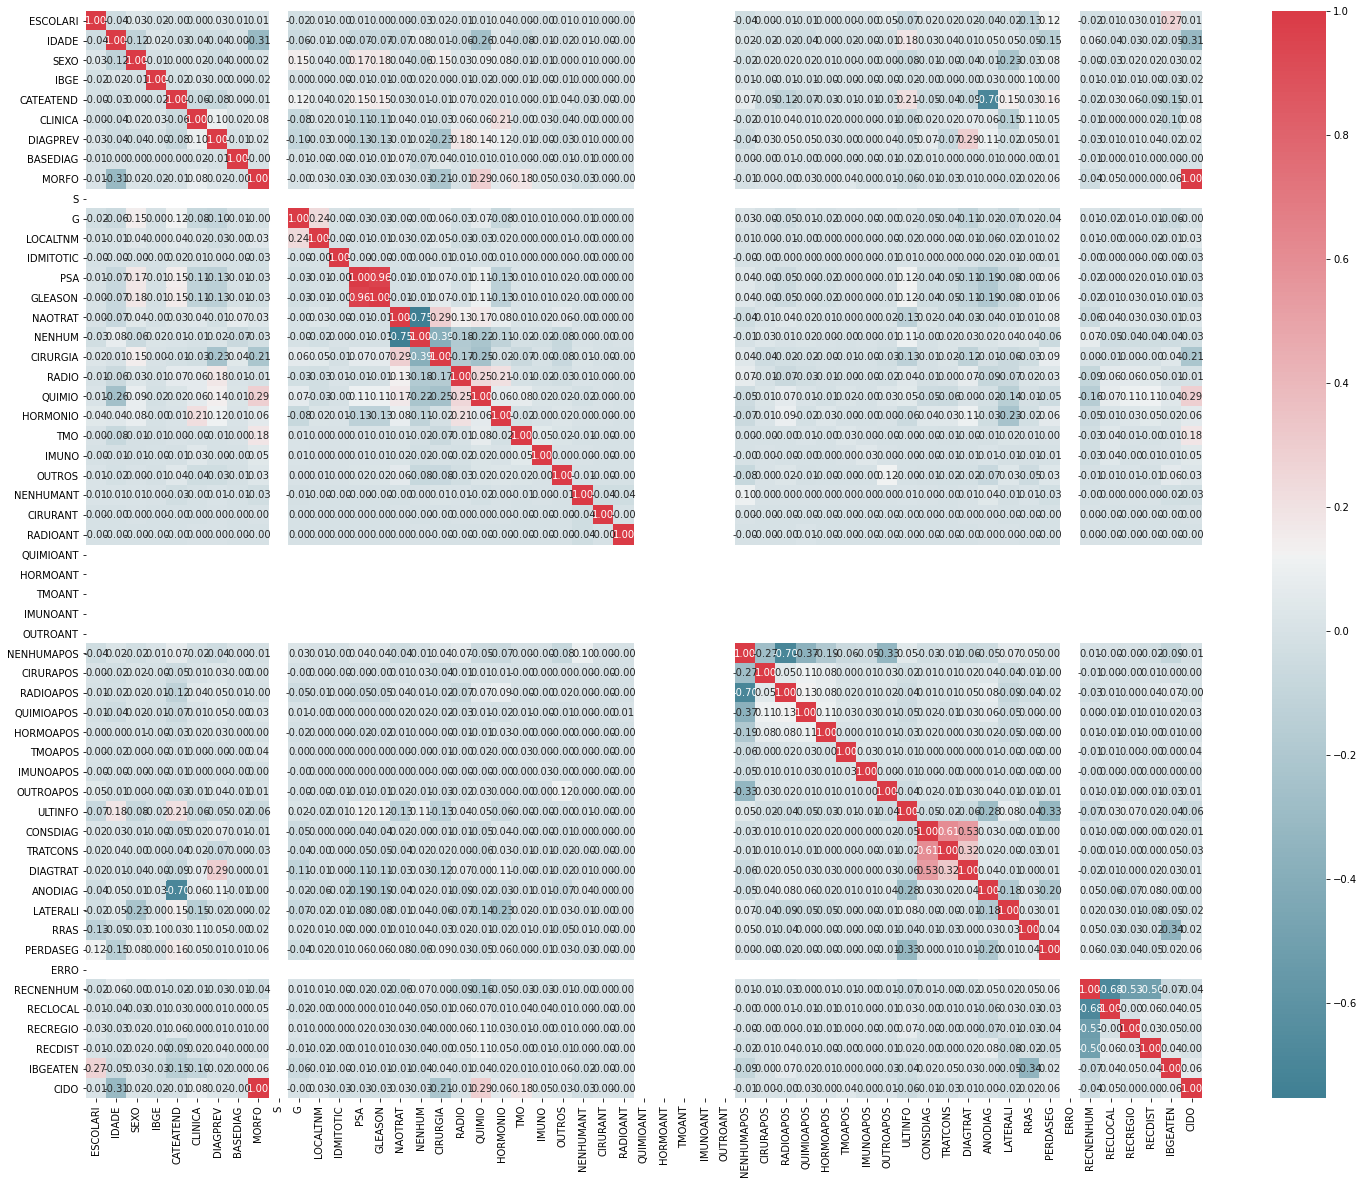

In [ ]:
correlations = corr_matrix

fig, ax = plt.subplots(figsize = (25,20))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
 
sns.heatmap(correlations, cmap = colormap, annot = True, fmt = '.2f')
fig.show()

## Localização dos hospitais e moradia dos pacientes

In [ ]:
fig = px.scatter_geo(df_naotrat, 
                     lat='latitude', 
                     lon='longitude',
                     color='razao',
                     scope='south america',
                     projection='natural earth'
                     )

fig.add_scattergeo(lat=df_hosp.latitude, 
                   lon=df_hosp.longitude,
                   name='Hospitais',
                   marker=dict(color='orange', size=7, symbol='diamond')
                   )

fig.update_layout(template='xgridoff', 
                  margin={"r":0,"l":0,"b":0}, 
                  title_text="Razão para não tratamento")
fig.update_layout()

fig.show()

## Variáveis faltantes

In [ ]:
fig = px.bar(x = prop.index, y = prop*100, labels={'y': '%', 'x':'Variable'},title='Percentage of missing data per column')
fig.show()

## Correlação df pré-processado

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_preprocessing.csv')
print(df.shape)
df.head(3)

(943659, 73)


,ESCOLARI,IDADE,SEXO,IBGE,CATEATEND,CLINICA,DIAGPREV,BASEDIAG,TOPO,TOPOGRUP,MORFO,EC,ECGRUP,T,N,M,PT,PN,PM,G,LOCALTNM,IDMITOTIC,PSA,GLEASON,META01,META02,META03,META04,NAOTRAT,TRATAMENTO,TRATHOSP,TRATFANTES,TRATFAPOS,NENHUM,CIRURGIA,RADIO,QUIMIO,HORMONIO,TMO,IMUNO,OUTROS,NENHUMANT,CIRURANT,RADIOANT,NENHUMAPOS,CIRURAPOS,RADIOAPOS,QUIMIOAPOS,HORMOAPOS,TMOAPOS,IMUNOAPOS,OUTROAPOS,ULTINFO,CONSDIAG,TRATCONS,DIAGTRAT,ANODIAG,CICI,CICIGRUP,FAIXAETAR,LATERALI,DRS,RRAS,PERDASEG,RECNENHUM,RECLOCAL,RECREGIO,RECDIST,REC01,REC02,REC03,REC04,IBGEATEN
0,4,40.0,2,3530805,9,15,1,3,222,45,81402,0,0,25,15,0,30,0,0,8,8,8,8,8,0,0,0,0,8,0,0,2,9,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,7,95.0,88.0,2000,23,5,4,8,14,15,1,1,0,0,0,0,0,0,0,3509502
1,9,45.0,2,3509502,9,15,1,3,222,45,80703,19,3,25,15,0,41,22,8,8,8,8,8,8,0,0,0,0,8,5,5,2,9,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,3,12,15.0,3.0,2000,23,5,4,8,7,15,0,1,0,0,0,0,0,0,0,3509502
2,2,63.0,2,3509502,9,15,1,3,222,45,80703,19,3,25,15,0,41,22,8,8,8,8,8,8,0,0,0,0,8,1,1,2,9,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,3,6,15.0,9.0,2000,23,5,6,8,7,15,0,1,0,0,0,0,0,0,0,3509502


In [ ]:
corr_matrix = df.corr()
np.abs(corr_matrix['ULTINFO']).sort_values(ascending = False).head(40)

ULTINFO       1.000000
PERDASEG      0.325490
ANODIAG       0.283658
CATEATEND     0.209677
IDADE         0.179051
FAIXAETAR     0.165968
EC            0.165720
TOPO          0.151847
META01        0.151016
TOPOGRUP      0.147326
ECGRUP        0.143449
CIRURGIA      0.127532
NAOTRAT       0.127175
GLEASON       0.123226
PSA           0.118750
NENHUM        0.108192
REC01         0.093359
META02        0.085978
SEXO          0.081509
T             0.079346
LATERALI      0.077999
PT            0.076031
N             0.071157
ESCOLARI      0.069297
RECNENHUM     0.068966
RECREGIO      0.068783
TRATHOSP      0.068196
DRS           0.067081
CLINICA       0.063309
MORFO         0.063006
TRATAMENTO    0.061359
TRATFAPOS     0.061088
HORMONIO      0.060879
DIAGTRAT      0.060874
REC02         0.058468
PN            0.055449
QUIMIO        0.054079
NENHUMAPOS    0.052510
META03        0.050217
QUIMIOAPOS    0.049821
Name: ULTINFO, dtype: float64

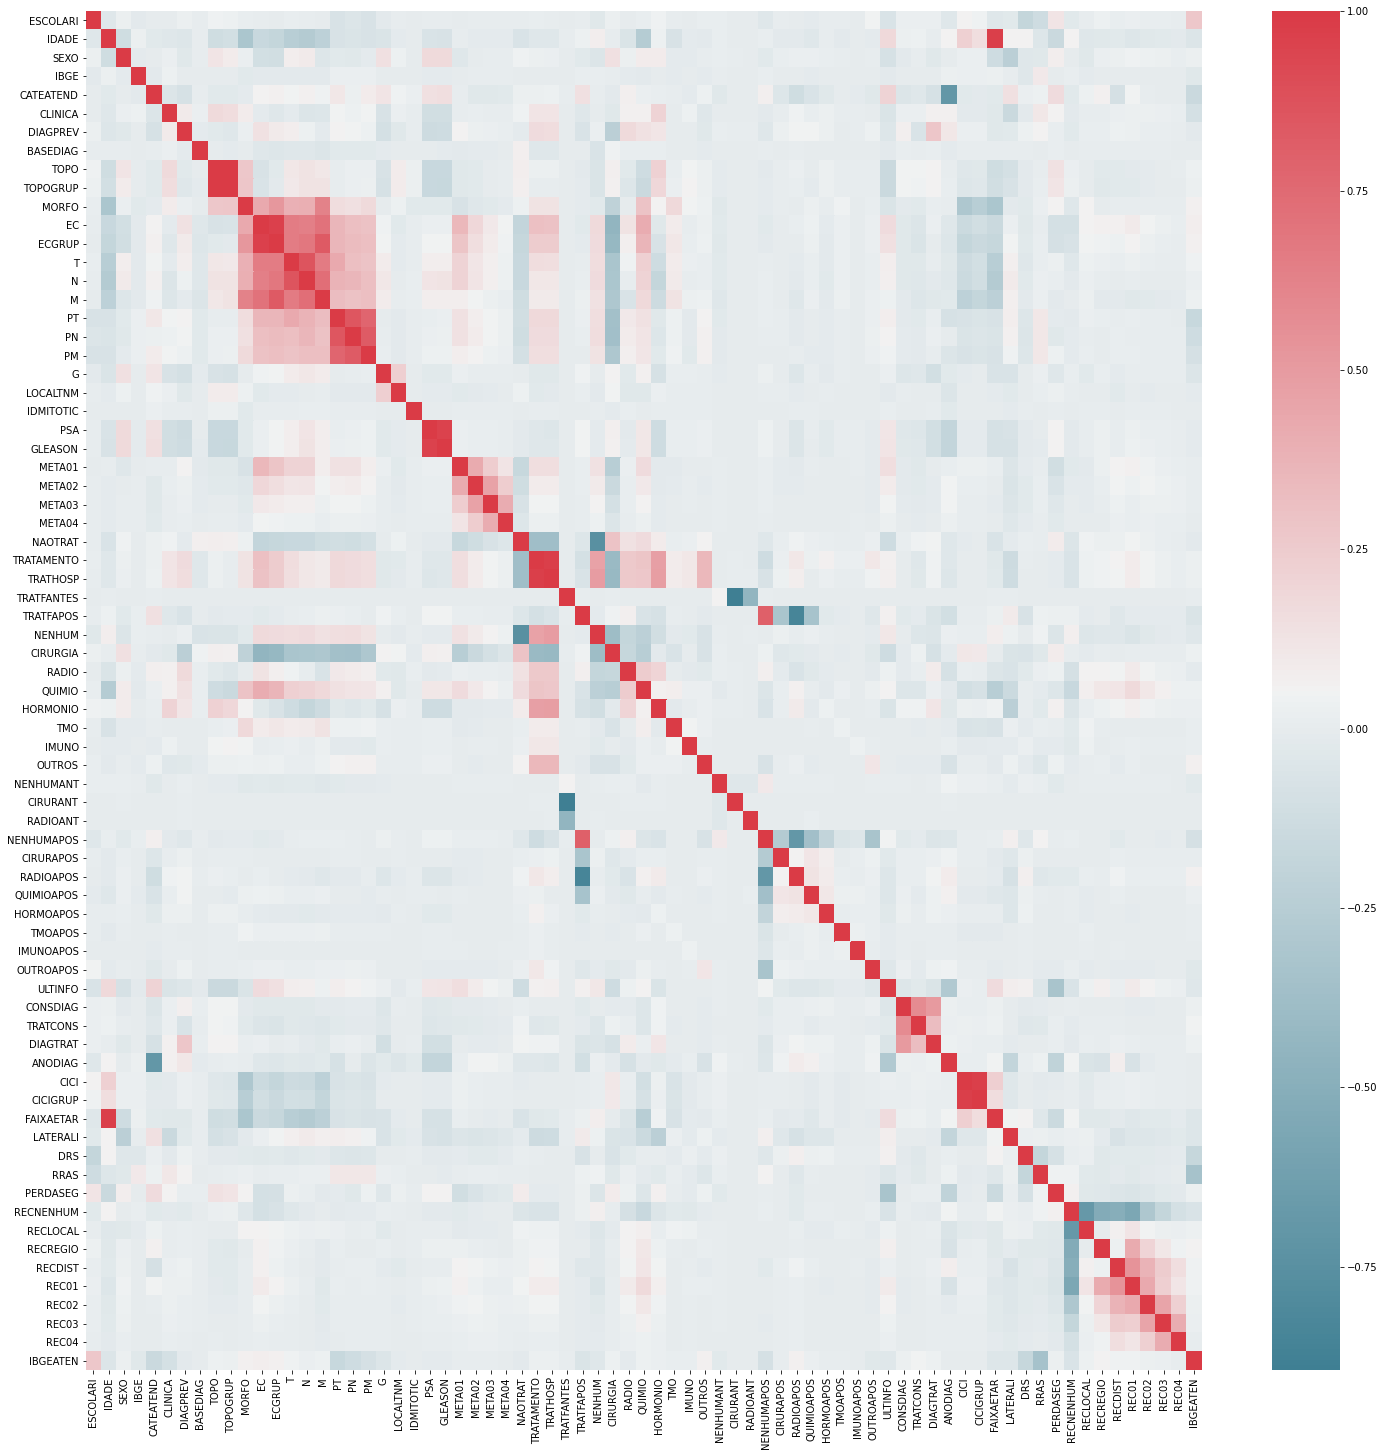

In [ ]:
correlations = corr_matrix

fig, ax = plt.subplots(figsize = (25,25))
colormap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(correlations, cmap = colormap,)# annot = True, fmt = '.2f')
fig.show()

# **Referências**

https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/

https://machinelearningmastery.com/clustering-algorithms-with-python/

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html